In [6]:
%run funcs.py
%matplotlib notebook
%run functions.py

'''Dataset loading, enumeration of all variables'''

In [2]:
%run dataset.py

In [3]:
avdataset.keys()

Index([u'key', u'handstrat', u'participant', u'melody', u'sex', u'age',
       u'score', u'genre', u'proc', u'qommax', u'qommin', u'qomav',
       u'handdistmax', u'handdistmin', u'handdistav', u'zmax', u'zmin', u'zav',
       u'distlh', u'distrh', u'melcat'],
      dtype='object')

In [4]:
# participants['ratio5'] = /participants['height']
# participants['ratio5'] = participants['zedmax']/participants['height']
# participants['rat'] = participants['y']/participants['height']

In [7]:
heightwise = participants.sort_values(['height','rat'],ascending=[1,0])
sns.tsplot(heightwise['height'])

KeyError: 'rat'

In [ ]:
heightwise['labels'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
heightwise

<IPython.core.display.Javascript object>


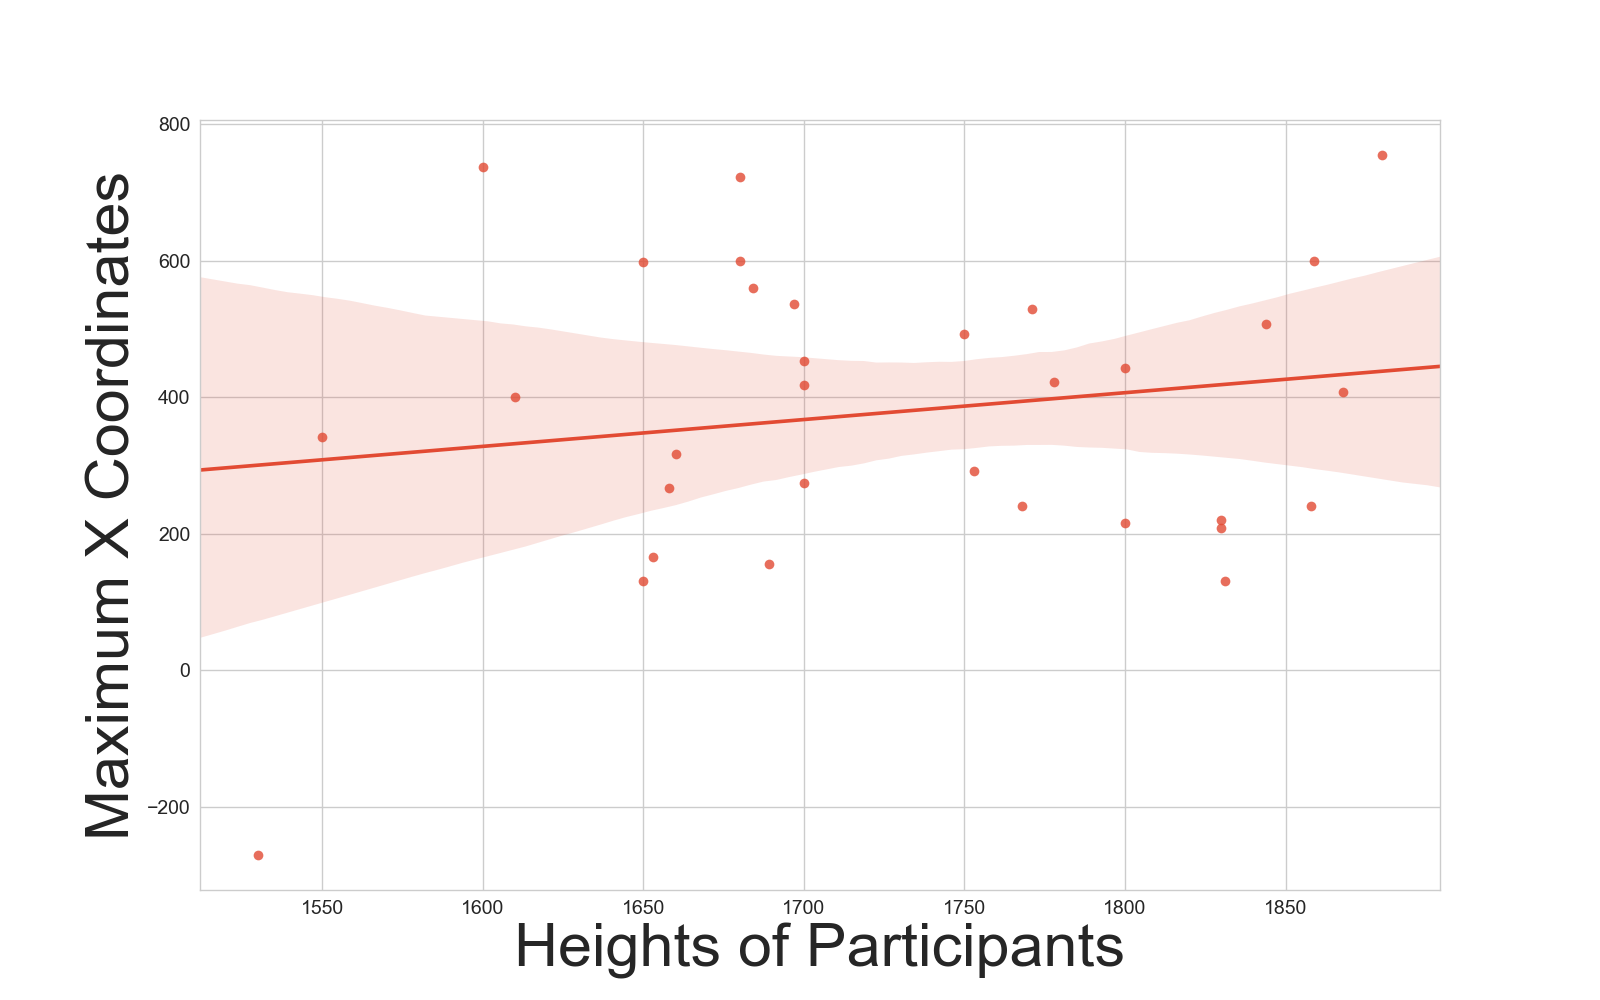

Text(0,0.5,u'Maximum X Coordinates')

In [381]:
import matplotlib.patches as mpatches
# participants['ratio2'] = participants['height']/participants['zedmax']
f,a = plt.subplots(figsize = (16,10))
a = sns.regplot(x = heightwise['height'],y = heightwise['x'])
# a = plt.scatter(x = heightwise['height'][heightwise['labels']==0],y = heightwise['rat'][heightwise['labels']==0],color='blue')
# a = plt.scatter(x = heightwise['height'][heightwise['labels']==1],y = heightwise['rat'][heightwise['labels']==1],color='red')
# red_patch = mpatches.Patch(color='red', label='Above 1.7 Metres')
# blue_patch = mpatches.Patch(color='blue', label='Below 1.7 Metres')
# plt.legend(handles=[red_patch,blue_patch])
plt.xlabel('Heights of Participants',fontsize = '44')
plt.ylabel('Maximum X Coordinates',fontsize = '44')
# plt.xticks('')
# df["A"][(df["B"] > 50) & (df["C"] == 900)]
# a = plt.scatter(heightwise['ratio'],color ='blue')

In [399]:
import numpy as np
import statsmodels.api as sm
spector_data = heightwise.dropna()['height']
y = heightwise.dropna()['x']

# Fit and summarize OLS model
mod = sm.OLS(spector_data, y)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     137.3
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           1.19e-11
Time:                        18:18:18   Log-Likelihood:                -206.48
No. Observations:                  26   AIC:                             415.0
Df Residuals:                      25   BIC:                             416.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              3.5124      0.300     11.718      0.0

In [404]:
import numpy as np
import statsmodels.api as sm
spector_data = heightwise.dropna()['height']
y = heightwise.dropna()['ratio5']*heightwise.dropna()['height']

# Fit and summarize OLS model
mod = sm.OLS(spector_data, y)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3498.
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           2.18e-28
Time:                        18:23:01   Log-Likelihood:                -166.48
No. Observations:                  26   AIC:                             335.0
Df Residuals:                      25   BIC:                             336.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1065      0.019     59.144      0.0

In [402]:
import numpy as np
import statsmodels.api as sm
spector_data = heightwise.dropna()['height']
y = heightwise.dropna()['zedmax']

# Fit and summarize OLS model
mod = sm.OLS(spector_data, y)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3498.
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           2.18e-28
Time:                        18:19:07   Log-Likelihood:                -166.48
No. Observations:                  26   AIC:                             335.0
Df Residuals:                      25   BIC:                             336.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zedmax         1.1065      0.019     59.144      0.0

In [316]:
heightwise['height'][heightwise['labels']==0]

22    1530
23    1550
21    1600
27    1610
31    1650
30    1650
9     1653
15    1658
17    1660
2     1680
28    1680
10    1684
13    1689
24    1697
29    1700
25    1700
Name: height, dtype: int64

In [196]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# avdataset.dropna()['distlh']
# we create 50 separable points
X = pd.DataFrame.as_matrix(heightwise.dropna()[['height']])
Y = pd.DataFrame.as_matrix(heightwise.dropna()[['labels']])
# X= X.reshape(-1, 1)
# Y = Y.reshape(-1, 1)
# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

ValueError: X has 2 features per sample; expecting 1

In [455]:
avdata2['distlh']

532    1545.205205
415     373.621263
586    6338.792195
118    5333.800147
265    1081.977571
273    4440.207952
183    1740.999432
88     3335.516522
474     584.334076
182    3549.638135
91     1576.975374
773    3724.014483
582     296.403568
576     325.322710
753    2944.060954
128     208.393431
383     103.422046
58     5700.201360
282    2447.384561
5      3235.443962
508     458.545945
731    1889.827822
653     290.263954
621    3829.292067
310    2322.480648
490     300.570875
740    3008.654596
362     423.424795
197    2387.705489
242    1150.428046
          ...     
547     494.124127
404    1780.221966
656    1526.882650
777    3815.621144
728    1797.944463
294     964.652483
257    2001.986829
689    2397.196146
122    2533.453007
759    1278.228854
159    3857.619118
359    1403.806103
735    1538.903238
413    1218.417030
531     343.062115
361    1494.991595
711     836.546565
778    3111.997688
221    2370.210757
158    1613.430832
369     961.290423
349     540.

<IPython.core.display.Javascript object>


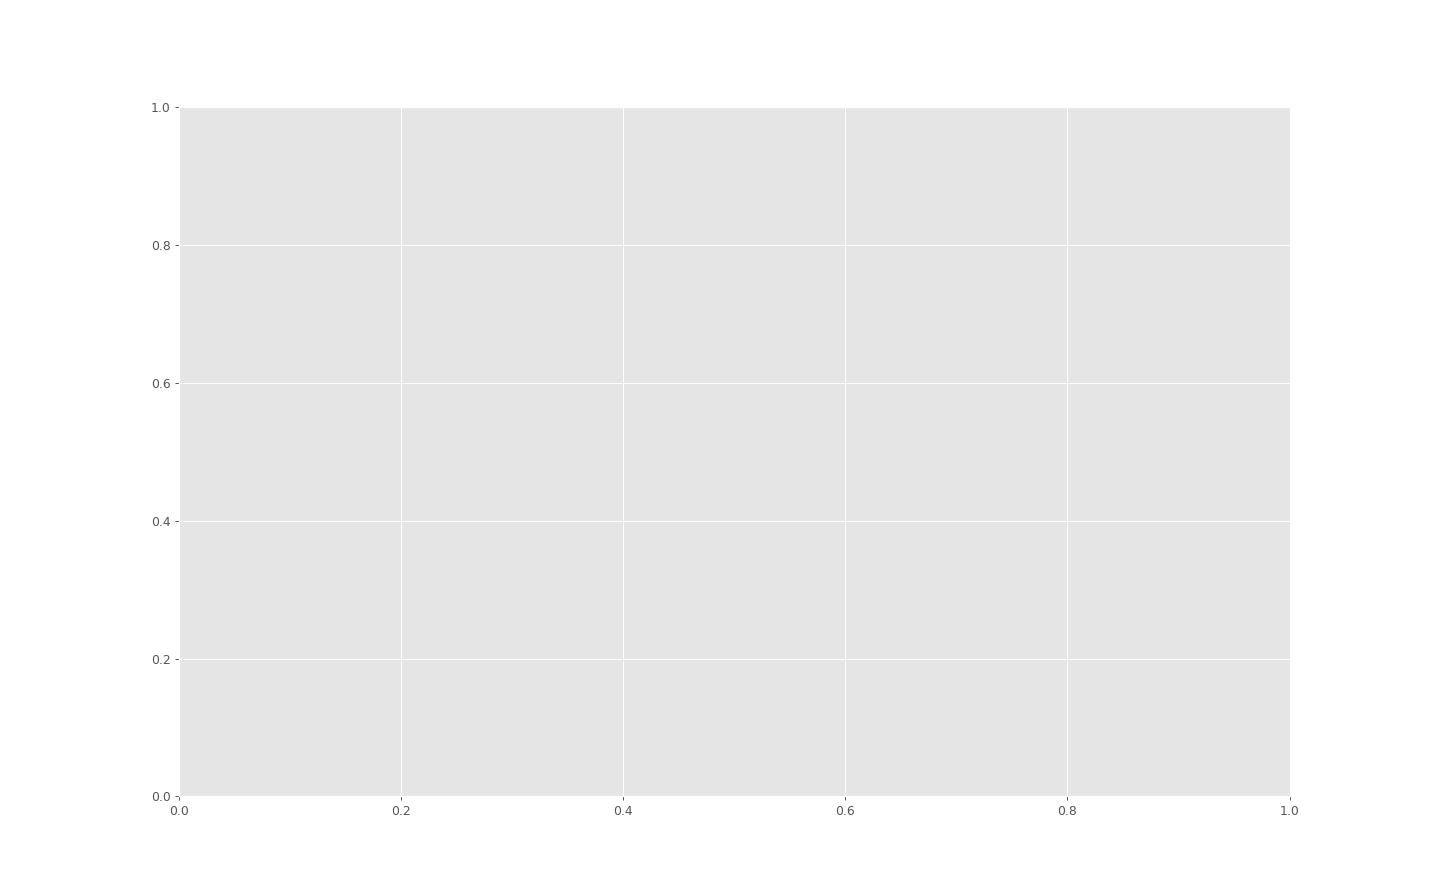

NameError: name 'avdata2' is not defined

In [9]:
fig,ax = plt.subplots(figsize=(16,10))
d = avdata2['distlh']
# ax = sns.distplot(d, hist=True, color="g", kde_kws={"shade": True})
d2 = avdata2['distrh']
ax = sns.distplot(d, hist=True, color="b", kde_kws={"shade": True})
# sns.displot(avdata2['distrh'])

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")             

paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}     
fig,ax =plt.subplots(figsize=(16, 10))
ax = sns.violinplot(x=avdataset['genre'],y=avdataset['distlh'],hue=avdataset['sex'],
                     split = True,inner="stick",scale="count",bw=.3,palette="RdBu", color_codes=True)
plt.xlabel('Genre',fontsize='32')
plt.ylabel('ZMax',fontsize = '28')
plt.setp(ax.get_legend().get_texts(), fontsize='28') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='28') # for legend title


In [8]:
import scipy
avdataset.describe()
scipy.stats.ttest_ind(avdataset.dropna()['distlh'], avdataset.dropna()['distrh'])

Ttest_indResult(statistic=-8.6940894849318706, pvalue=8.5659289182401089e-18)

In [225]:
avdata2 = avdataset.sort_values(['genre','zmax'],ascending=[1,0])
avdata2

key  handstrat  participant  melody sex  age  score genre  proc  \
532  532          1            2       3   M   23    465    im  norm   
415  415          1            6       1   M   30    563    im  norm   
586  586          3            1      17   F   26    175    im   syn   
118  118          3            1      20   F   26    175    im   syn   
265  265          1            4      18   F   29    972    im   syn   
273  273          3            1      19   F   26    175    im   syn   
183  183          2            8       2   M   25    839    im  norm   
88    88          3           25       4   M   24    865    im  norm   
474  474          1           16       4   F   31    912    im  norm   
182  182          3            2      19   M   23    465    im   syn   
91    91          3           31       4   F   23    566    im  norm   
773  773          2           21      18   F   20    499    im   syn   
582  582          1            6      18   M   30    563    im   syn   
576  576          1            6      17   M   30    563    im   syn   
753  753          2            2      18   M   23    465    im   syn   
128  128          1            6      19   M   30    563    im   syn   
383  383          1           12       2   M   25    702    im  norm   
58    58          3            5       4   M   26    958    im  norm   
282  282          3           10      17   F   31    913    im   syn   
5      5          3           25      19   M   24    865    im   syn   
508  508          1            6      20   M   30    563    im   syn   
731  731          3            5      19   M   26    958    im   syn   
653  653          1            2      20   M   23    465    im   syn   
621  621          4            5       3   M   26    958    im  norm   
310  310          3            3      20   F   53    989    im   syn   
490  490          1            6       3   M   30    563    im  norm   
740  740          3            2      17   M   23    465    im   syn   
362  362          1            6       4   M   30    563    im  norm   
197  197          3           13      18   F   27    100    im   syn   
242  242          1           14       4   F   31    995    im  norm   
..   ...        ...          ...     ...  ..  ...    ...   ...   ...   
547  547          1           31      16   F   23    566    vo  norm   
404  404          4           16      15   F   31    912    vo  norm   
656  656          3           10      31   F   31    913    vo   syn   
777  777          3           13      30   F   27    100    vo   syn   
728  728          4           20      13   M   34    467    vo  norm   
294  294          4            7      30   M   37    973    vo   syn   
257  257          2           21      29   F   20    499    vo   syn   
689  689          6           11      32   F   24    438    vo   syn   
122  122          6           13      29   F   27    100    vo   syn   
759  759          2           11      15   F   24    438    vo  norm   
159  159          3           10      30   F   31    913    vo   syn   
359  359          3           11      29   F   24    438    vo   syn   
735  735          3            7      15   M   37    973    vo  norm   
413  413          2           20      15   M   34    467    vo  norm   
531  531          1           22      13   F   49    965    vo  norm   
361  361          3            2      15   M   23    465    vo  norm   
711  711          4           31      15   F   23    566    vo  norm   
778  778          4           13      15   F   27    100    vo  norm   
221  221          3           11      16   F   24    438    vo  norm   
158  158          4            3      31   F   53    989    vo   syn   
369  369          2           22      30   F   49    965    vo   syn   
349  349          1           22      29   F   49    965    vo   syn   
380  380          2           22      15   F   49    965    vo  norm   
769  769          4           10      13   F 

<IPython.core.display.Javascript object>


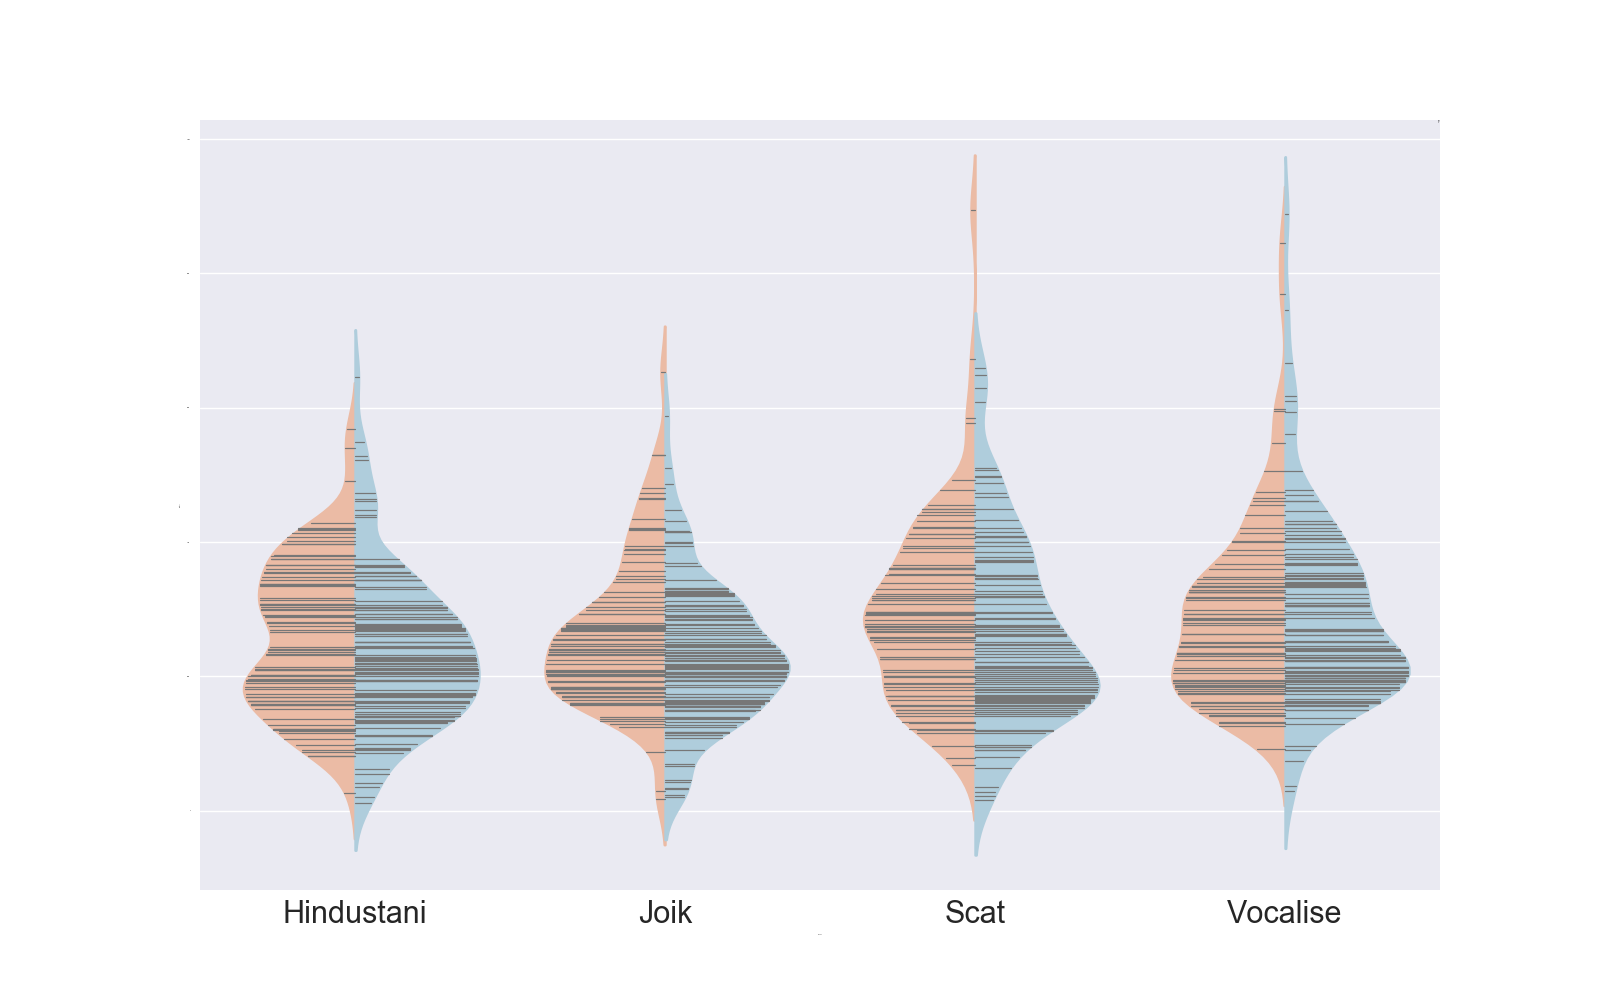

[Text(0,0,u'Hindustani'),
 Text(0,0,u'Joik'),
 Text(0,0,u'Scat'),
 Text(0,0,u'Vocalise')]

In [439]:
fig,ax2 = plt.subplots(figsize = (16,10))
sns.set(font_scale=0)
# ax2.set_ylim(0,10000)
ax2.yaxis.get_ticklabels()
# ax2
ax2 = sns.violinplot(x=avdata2['genre'],y=avdata2['distrh'],hue=avdata2['sex'], bw = 0.3,
                    split = True,inner="sticks",palette='RdBu', color_codes=True)
ax2.set_xticklabels(['Hindustani','Joik','Scat','Vocalise'],fontsize='22')


<IPython.core.display.Javascript object>


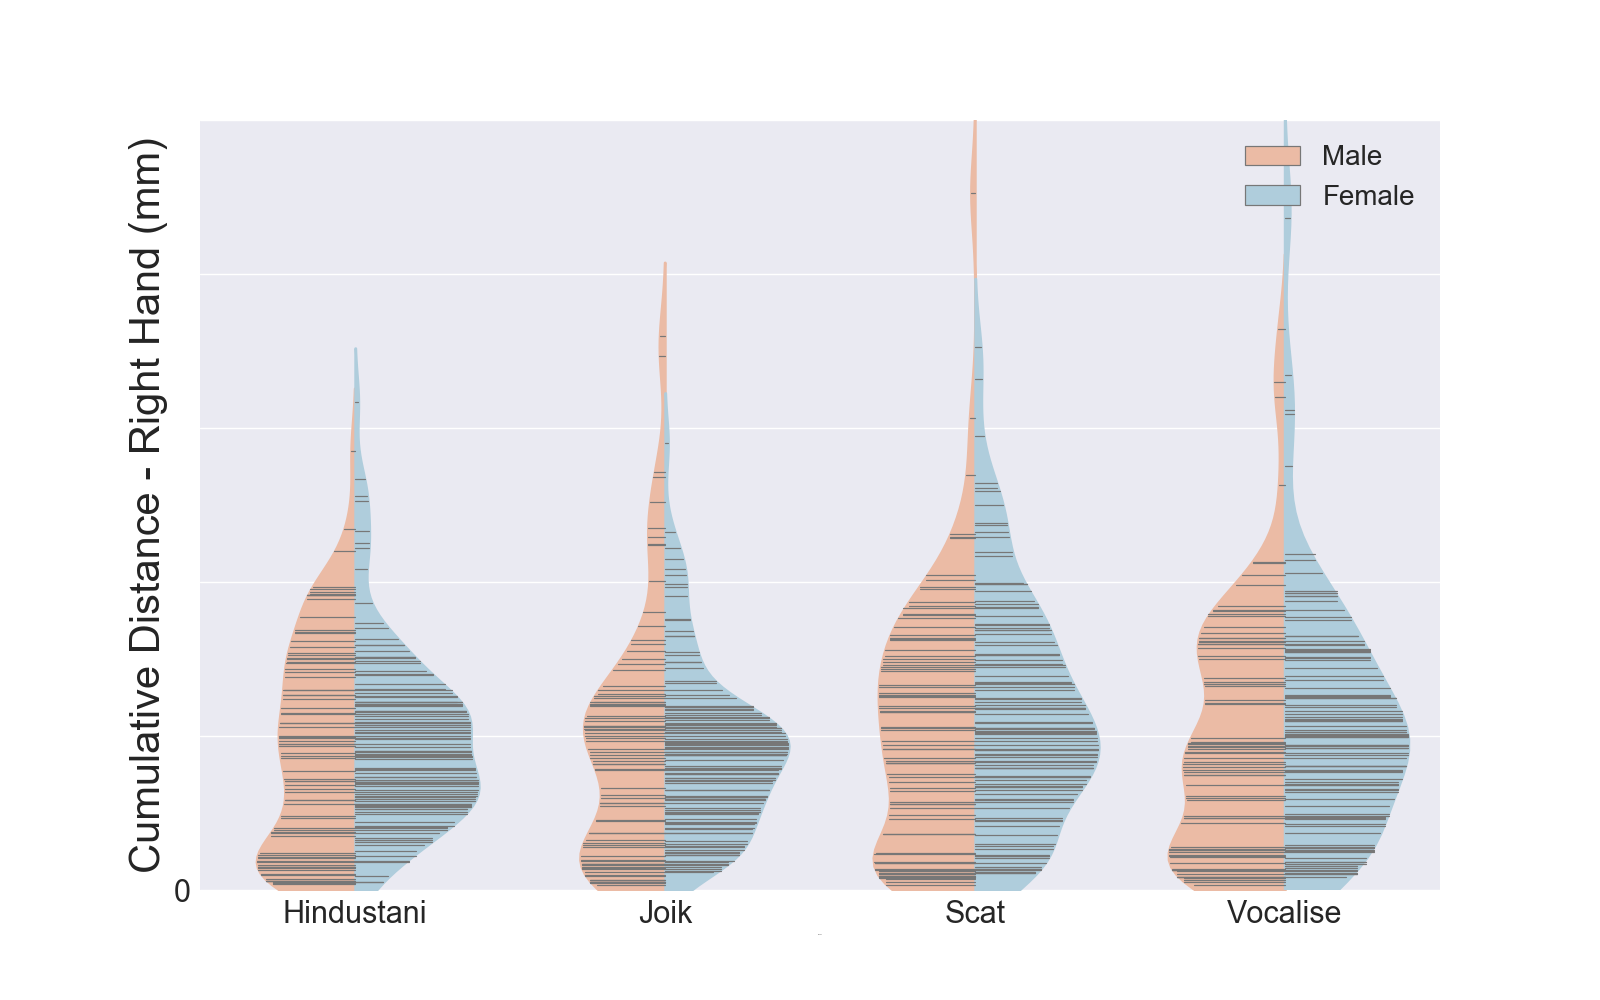

Text(0,0.5,u'Cumulative Distance - Right Hand (mm)')

In [447]:
fig,ax2 = plt.subplots(figsize = (16,10))
sns.set(font_scale=0)
ax2.set_ylim(0,10000)
ax2 = sns.violinplot(x=avdata2['genre'],y=avdata2['distlh'],hue=avdata2['sex'], bw = 0.3,
                    split = True,inner="sticks",palette='RdBu', color_codes=True)
ax2.set_xticklabels(['Hindustani','Joik','Scat','Vocalise'],fontsize='22')
ax2.set_yticklabels([0,],fontsize='22')
handles, labels = fig.get_axes()[0].get_legend_handles_labels()
fig.get_axes()[0].legend((handles[0],handles[1]), ("Male", 'Female'), loc='upper right',fontsize = '20')
# plt.xlabel('Hand Strategy ID',fontsize = '30')
plt.ylabel('Cumulative Distance - Right Hand (mm)',fontsize = '30')

In [259]:
for i in range(len(melodies)):
    melodies['avs'][i] = numpy.mean(melodies['pitches'][i])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0     180.064499
1     178.391342
2     177.376435
3     209.737991
4     275.419632
5     214.985799
6     283.211262
7     298.945999
8     230.527710
9     319.501216
10    417.204651
11    414.198898
12    348.068162
13    372.980996
14    253.632282
15    418.118570
Name: avs, dtype: float64

<IPython.core.display.Javascript object>


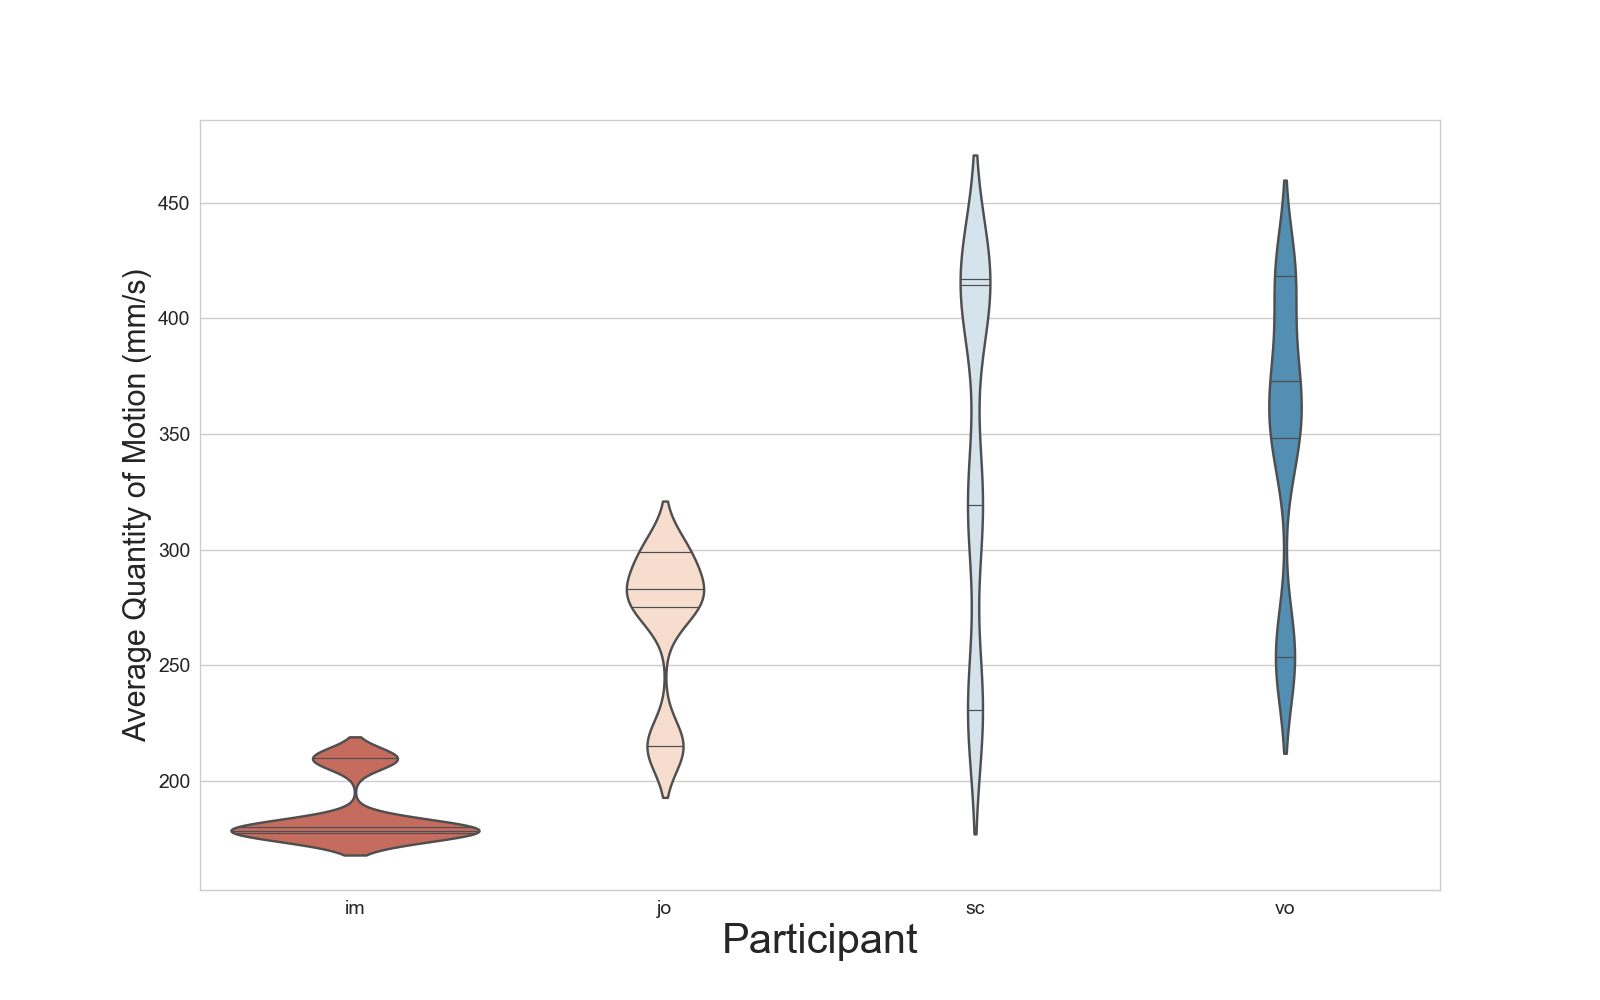

Text(0,0.5,u'Average Quantity of Motion (mm/s)')

In [262]:
# melodies['genre'] = ['im','im','im','im','jo','jo','jo','jo','sc','sc','sc','sc','vo','vo','vo','vo']
#double the pitch
# melodies.iloc[12:16]['pitches'] = 2*melodies.iloc[12:16]['pitches']\
fig,a3 = plt.subplots(figsize = (16,10))
a3 = sns.violinplot(x=melodies['genre'],y=melodies['avs'], bw = 0.3,
                    split = True,inner="sticks",palette='RdBu', color_codes=True)
# ax2.set_xticklabels(['1','2','3']fontsize='22')
handles, labels = fig.get_axes()[0].get_legend_handles_labels()
fig.get_axes()[0].legend((handles[0],handles[1]), ("Original Melodies", "Resynthesized Melodies"), loc='upper right',fontsize = '18')
plt.xlabel('Participant',fontsize = '30')
plt.ylabel('Average Quantity of Motion (mm/s)',fontsize = '22')

<IPython.core.display.Javascript object>


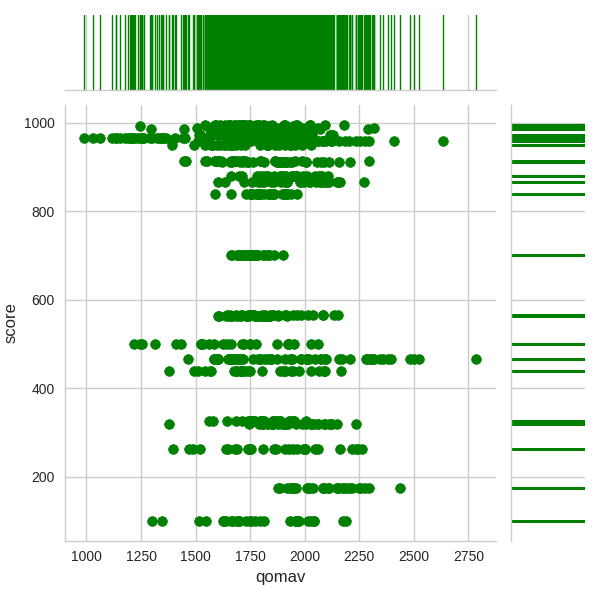

In [30]:
# fig,ax123 = plt.subplots(figsize = (16,10))
x = avdataset['qomav']
y = avdataset['score']

grid = sns.JointGrid(x, y)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

# ax123 = sns.JointGrid(

In [ ]:
fig,ax2 = plt.subplots(figsize = (16,10))
ax2 = sns.violinplot(x=participants['height'],y=participants['labels'],
                    split = True,inner="quart",palette='Set2',bw=0.5, color_codes=True)
plt.xlabel('Genres vs Average Hand Distance')

'''Plots'''

#hand distances vs strategies
#qom for each genre for each sex
#qom for each processing style for each sex
#qom per participant
#hand distance vs genre

#hand distance vs processing style

In [32]:
%run functions.py

In [33]:
qomlhrh(tracings[9])

{'qomlh': 939.51118317610781, 'qomrh': 1408.2885109974711}

In [12]:
eachtracing = dict()
pieces = os.listdir(basefile+'data/normdatadump/')        
pitches = os.listdir(basefile+'sound/pitch/')



p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32 = ([] for i in range(32))

def settopiece(stri,y):
    s ='p'+str(y)
    eval(s).append(stri)
    return

for i in range(len(pieces)):
    pieces[i] = pieces[i][:-4]
    melID = returnDetails(pieces[i])['melID']
    settopiece(pieces[i],melID)

In [1]:


# y, ax = plt.subplots()
m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32 = ([] for i in range(32))

for i in range(1,33):
    stri = 'm'+str(i)
    pie = 'p'+str(i)
    for j in range(0,14,1):
#         print(eval(pie)[j])
#         print(i,j)
        eval(stri).append(qomnew(eval(pie)[j]))

# # # eval(stri)[j]
# for i in range(len(m15)):
#     ax.plot(m1[i])
#     ax.plot(m17[i])
# # print(p29)
             

f, ax = plt.subplots(4,4,sharex=True,sharey=True,figsize=(16,10))
for i in range(4):
    for i in range(len(m1)):
        ax[0,0].plot(m1[i],color = 'teal',linewidth = '0.3')
        ax[0,0].plot(m17[i],color = 'grey',linewidth = '0.3')
        ax[0,0].set_title('Hindustani')
    for i in range(len(m2)):
        ax[0,1].plot(m2[i],color = 'teal',linewidth = '0.3')
        ax[0,1].plot(m18[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m3)):
        ax[0,2].plot(m3[i],color = 'teal',linewidth = '0.3')
        ax[0,2].plot(m19[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m4)):
        ax[0,3].plot(m4[i],color = 'teal',linewidth = '0.3')
        ax[0,3].plot(m20[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m5)):
        ax[1,0].plot(m5[i],color = 'teal',linewidth = '0.3')
        ax[1,0].plot(m21[i],color = 'grey',linewidth = '0.3')
        ax[1,0].set_title('Joik')
    for i in range(len(m6)):
        ax[1,1].plot(m6[i],color = 'teal',linewidth = '0.3')
        ax[1,1].plot(m22[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m7)):
        ax[1,2].plot(m7[i],color = 'teal',linewidth = '0.3')
        ax[1,2].plot(m23[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m8)):
        ax[1,3].plot(m8[i],color = 'teal',linewidth = '0.3')
        ax[1,3].plot(m24[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m9)):
        ax[2,0].plot(m9[i],color = 'teal',linewidth = '0.3')
        ax[2,0].plot(m25[i],color = 'grey',linewidth = '0.3')
        ax[2,0].set_title('Scat')
    for i in range(len(m10)):
        ax[2,1].plot(m10[i],color = 'teal',linewidth = '0.3')
        ax[2,1].plot(m26[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m11)):
        ax[2,2].plot(m11[i],color = 'teal',linewidth = '0.3')
        ax[2,2].plot(m27[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m12)):
        ax[2,3].plot(m12[i],color = 'teal',linewidth = '0.3')
        ax[2,3].plot(m28[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m13)):
        ax[3,0].plot(m13[i],color = 'teal',linewidth = '0.3')
        ax[3,0].plot(m29[i],color = 'grey',linewidth = '0.3')
        ax[3,0].set_title('Vocalise')
    for i in range(len(m14)):
        ax[3,1].plot(m14[i],color = 'teal',linewidth = '0.3')
        ax[3,1].plot(m30[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m15)):
        ax[3,2].plot(m15[i],color = 'grey',linewidth = '0.3')
        ax[3,2].plot(m31[i],color = 'teal',linewidth = '0.3')
    for i in range(len(m16)):
        ax[3,3].plot(m16[i],color = 'grey',linewidth = '0.3')
        ax[3,3].plot(m32[i],color = 'teal',linewidth = '0.3')


NameError: name 'qomnew' is not defined

### December 6, for plotting for final submission

In [22]:
m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32 = ([] for i in range(32))

for i in range(1,33):
    stri = 'm'+str(i)
    pie = 'p'+str(i)
    for j in range(0,14,1):
#         print(eval(pie)[j])
#         print(i,j)
        eval(stri).append(getlhrh(eval(pie)[j])['rh']['RHZ'])

In [206]:
melodies

names                                            pitches
0      1                0
0    149.953407
1    149.94144...
1      2                0
0    160.888612
1    141.88633...
2      3                0
0    189.591800
1    191.00921...
3      4                0
0    214.205007
1    221.56683...
4      5                0
0    255.027198
1    247.67223...
5      6                0
0    101.126622
1     94.17632...
6      7                0
0    285.163078
1    283.41233...
7      8                0
0    237.864488
1    230.73741...
8      9                0
0    122.387140
1    115.15932...
9     10                0
0    270.991061
1    268.18451...
10    11                0
0    591.130618
1    644.98215...
11    12                0
0    459.816538
1    495.73617...
12    13                0
0    173.515116
1    171.35164...
13    14                0
0    437.429512
1    444.69017...
14    15                0
0    267.592244
1    262.28560...
15    16                0
0    280.963992
1    273.42747...

In [201]:
who

AutoVivification	 SGDClassifier	 X	 X1	 X2	 Y	 Z	 a	 accr	 
age	 allpieces	 avdataset	 ax	 ax1	 ax2	 ax3	 ax4	 ax_arr	 
basefile	 clf	 colHeads	 colHeads_old	 cols	 cols1	 cols2	 cols3	 contset	 
curve_fit	 dataset	 df2	 displrh	 displyax	 distance	 distlh	 distrh	 eachtracing	 
f	 fig	 folder	 genre	 getlhrh	 getlhrhn	 handdist	 handdistav	 handdistmax	 
handdistmin	 handdists	 handdistvals	 handstrat	 handstrats	 heightwise	 i	 im	 imageio	 
img1	 img10	 img11	 img12	 img13	 img14	 img15	 img16	 img2	 
img3	 img4	 img5	 img6	 img7	 img8	 img9	 j	 jo	 
key	 linspace	 lz	 m	 m1	 m10	 m11	 m12	 m13	 
m14	 m15	 m16	 m17	 m18	 m19	 m2	 m20	 m21	 
m22	 m23	 m24	 m25	 m26	 m27	 m28	 m29	 m3	 
m30	 m31	 m32	 m4	 m5	 m6	 m7	 m8	 m9	 
make_blobs	 matplotlib	 maxminret	 maxminz	 mel	 melID	 melcat	 melodies	 melody	 
mpimg	 n	 n_samples	 names	 np	 numpy	 os	 p	 p1	 
p10	 p11	 p12	 p13	 p14	 p15	 p16	 p17	 p18	 
p19	 p2	 p20	 p21	 p22	 p23	 p24	 p25	 p26	 
p27	 p28	 p29	 p3	 p30	 p31	 p32	 p4	 

In [8]:
melod = zip(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32)
melod=pd.DataFrame(melod)
melod

NameError: name 'm1' is not defined

In [9]:
contset.keys()

Index([u'key', u'handstrat', u'participant', u'melody', u'sex', u'age',
       u'score', u'genre', u'proc', u'lz', u'rz', u'qomvals', u'velr', u'accr',
       u'mel', u'handdistvals', u'melcat', u'vels'],
      dtype='object')

In [ ]:
melcat = []
for i in range(len(contset)): 
    if int(contset['melody'][i]) <= 16:
        melcat.append(int(dataset['melody'][i]))
    elif int(dataset['melody'][i])>16:
        melcat.append(int(dataset['melody'][i])-16)

dataset['melcat'] = melcat
avdataset['melcat'] = melcat
contset['melcat'] = melcat

In [196]:
avdataset.keys()

Index([u'key', u'handstrat', u'participant', u'melody', u'sex', u'age',
       u'score', u'genre', u'proc', u'qommax', u'qommin', u'qomav',
       u'handdistmax', u'handdistmin', u'handdistav', u'zmax', u'zmin', u'zav',
       u'distlh', u'distrh', u'melcat'],
      dtype='object')

<IPython.core.display.Javascript object>


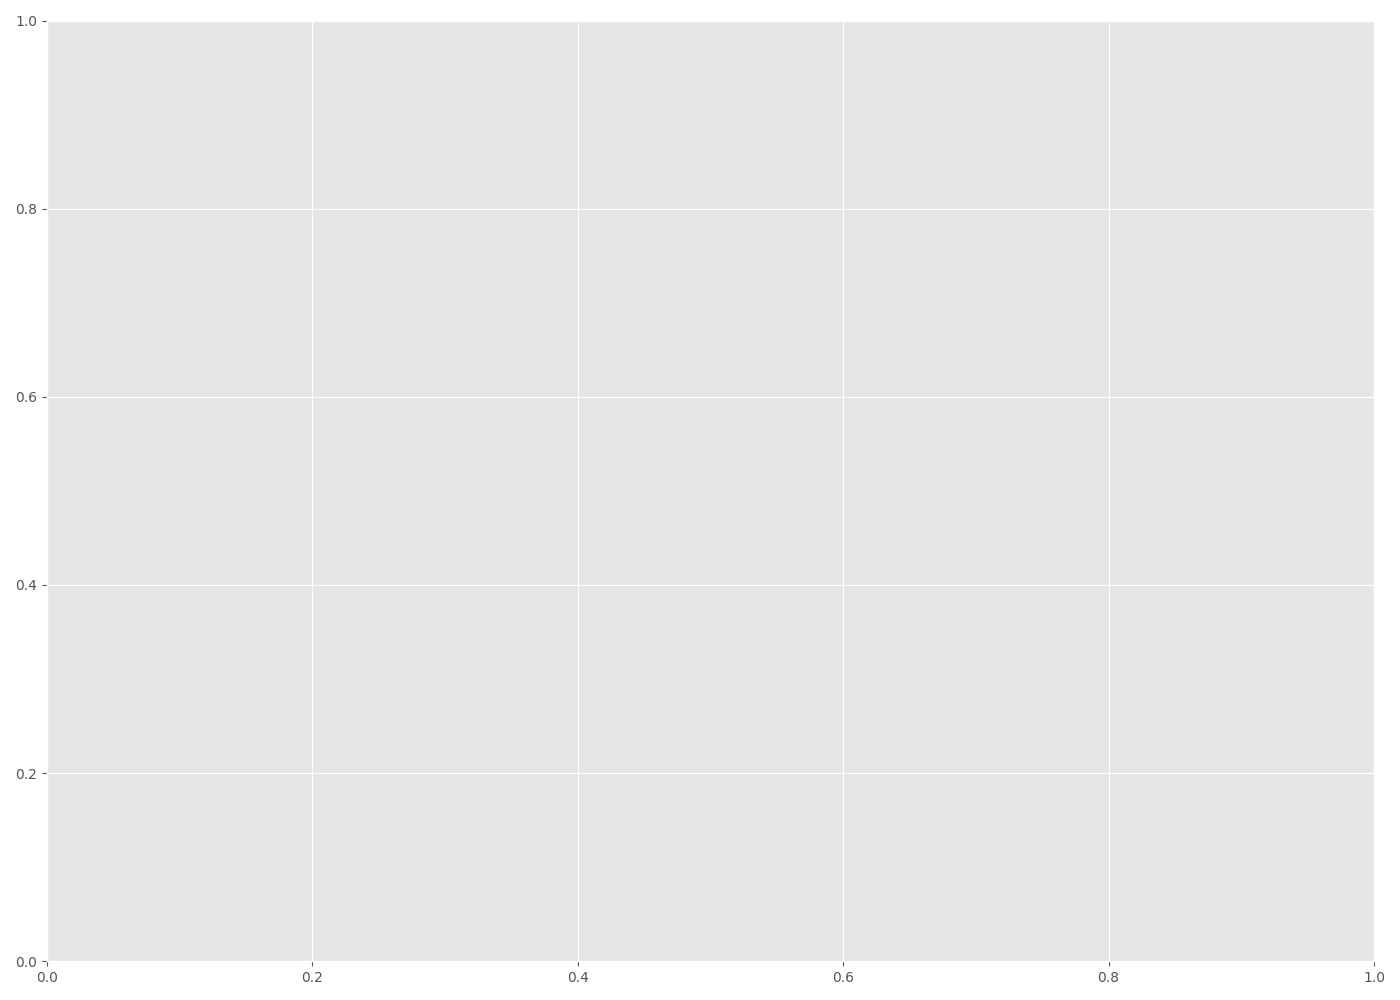

NameError: name 'sns' is not defined

In [10]:
f,a=plt.subplots(figsize = (14,10))
f.tight_layout()
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
a.set_ylim(0,2000)
a = sns.tsplot(m32,err_style="boot_traces",color='blue')
a = sns.tsplot(m16,err_style="boot_traces",color='red')
# a.set_xlabel('Time in Seconds',fontsize = '40')
# a.set_ylabel('Vertical Movement in Milimetres',fontsize = '40')
# ax = sns.tsplot(sines);                      # capture axis
# n = len(a.xaxis.get_ticklabels())           # count labels
# a.set_xticklabels(numpy.linspace(0, 4.5, n),fontsize = '30')




<IPython.core.display.Javascript object>


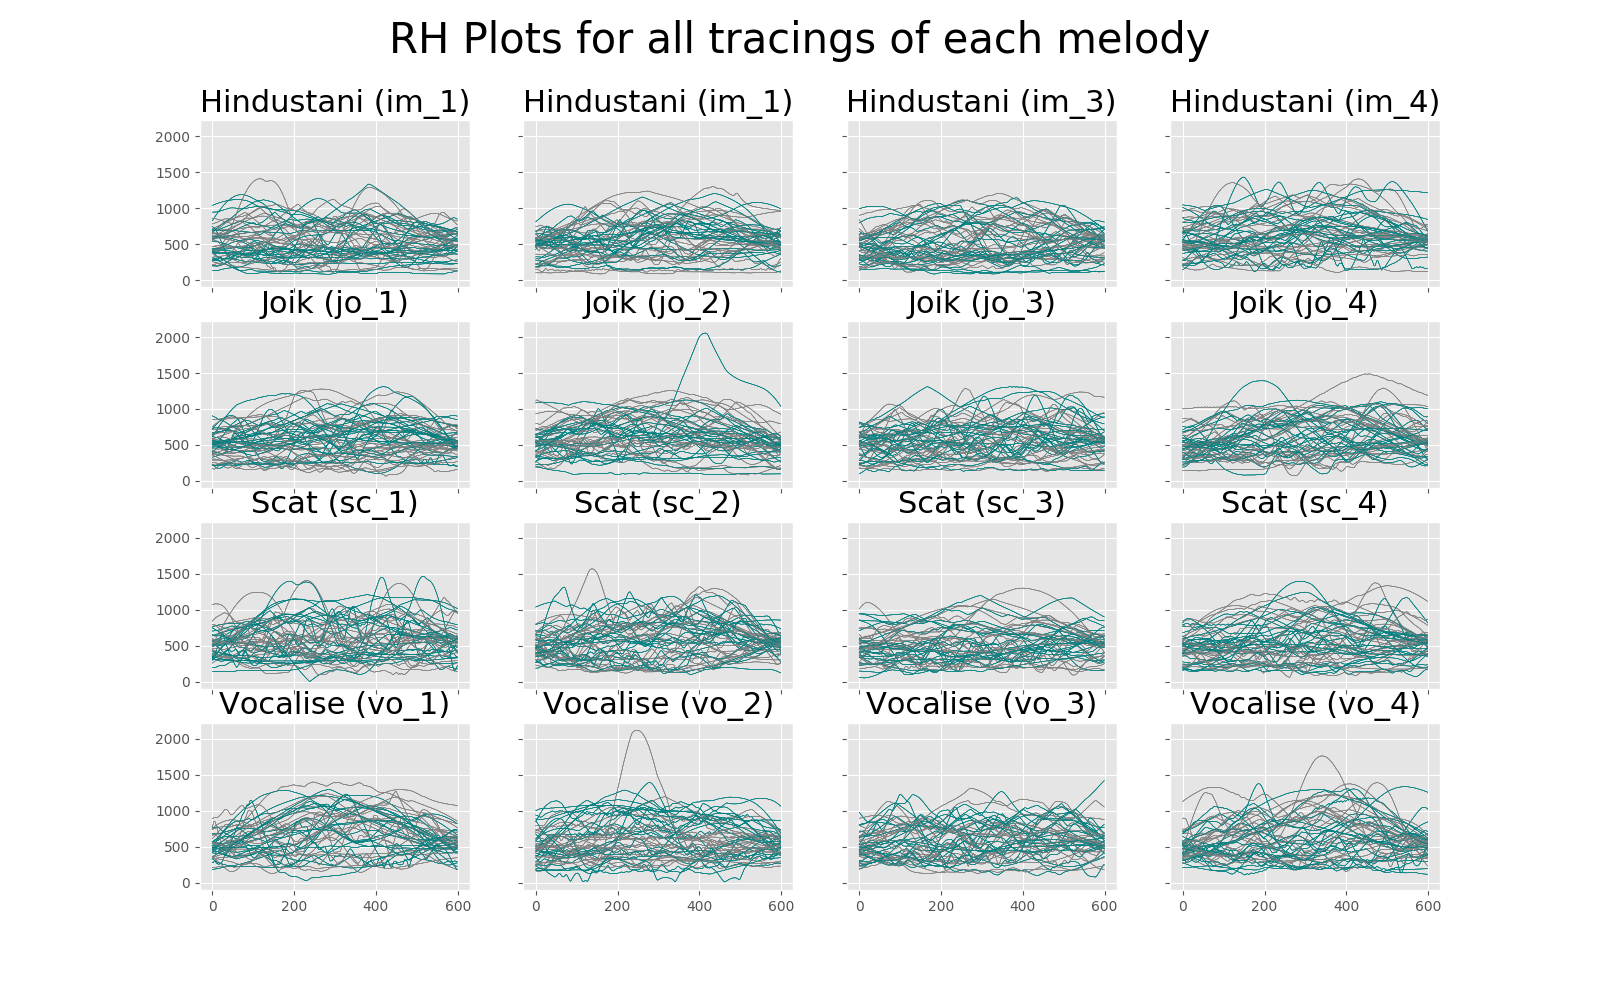

Text(0.5,0.98,u'RH Plots for all tracings of each melody')

In [11]:
# y, ax = plt.subplots()
from pandas.tools.plotting import andrews_curves

m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32 = ([] for i in range(32))

for i in range(len(contset)):
    mel = contset['melody'][i]
    v = contset['handdistvals'][i]
    stri = 'm'+str(mel)
    eval(stri).append(contset['handdistvals'][i])

f, ax = plt.subplots(4,4,sharex=True,sharey=True,figsize=(16,10))
for i in range(4):
    for i in range(len(m17)):
        ax[0,0].plot(m1[i],color = 'teal',linewidth = '0.3')
        ax[0,0].plot(m17[i],color = 'grey',linewidth = '0.3')
        ax[0,0].set_title('Hindustani (im_1)',fontsize='22')
    for i in range(len(m2)):
        ax[0,1].plot(m2[i],color = 'teal',linewidth = '0.3')
        ax[0,1].plot(m18[i],color = 'grey',linewidth = '0.3')
        ax[0,1].set_title('Hindustani (im_1)',fontsize='22')
    for i in range(len(m3)):
        ax[0,2].plot(m3[i],color = 'teal',linewidth = '0.3')
        ax[0,2].plot(m19[i],color = 'grey',linewidth = '0.3')
        ax[0,2].set_title('Hindustani (im_3)',fontsize='22')
    for i in range(len(m4)):
        ax[0,3].plot(m4[i],color = 'teal',linewidth = '0.3')
        ax[0,3].plot(m20[i],color = 'grey',linewidth = '0.3')
        ax[0,3].set_title('Hindustani (im_4)',fontsize='22')
    for i in range(len(m5)):
        ax[1,0].plot(m5[i],color = 'teal',linewidth = '0.3')
        ax[1,0].plot(m21[i],color = 'grey',linewidth = '0.3')
        ax[1,0].set_title('Joik (jo_1)',fontsize='22')
    for i in range(len(m6)):
        ax[1,1].plot(m6[i],color = 'teal',linewidth = '0.3')
        ax[1,1].plot(m22[i],color = 'grey',linewidth = '0.3')
        ax[1,1].set_title('Joik (jo_2)',fontsize='22')
    for i in range(len(m7)):
        ax[1,2].plot(m7[i],color = 'teal',linewidth = '0.3')
        ax[1,2].plot(m23[i],color = 'grey',linewidth = '0.3')
        ax[1,2].set_title('Joik (jo_3)',fontsize='22')
    for i in range(len(m24)):
        ax[1,3].plot(m8[i],color = 'teal',linewidth = '0.3')
        ax[1,3].plot(m24[i],color = 'grey',linewidth = '0.3')
        ax[1,3].set_title('Joik (jo_4)',fontsize='22')
    for i in range(len(m25)):
        ax[2,0].plot(m9[i],color = 'teal',linewidth = '0.3')
        ax[2,0].plot(m25[i],color = 'grey',linewidth = '0.3')
        ax[2,0].set_title('Scat (sc_1)',fontsize='22')
#         ax[2,0].set_title('Scat')
    for i in range(len(m26)):
        ax[2,1].plot(m10[i],color = 'teal',linewidth = '0.3')
        ax[2,1].plot(m26[i],color = 'grey',linewidth = '0.3')
        ax[2,1].set_title('Scat (sc_2)',fontsize='22')
    for i in range(len(m11)):
        ax[2,2].plot(m11[i],color = 'teal',linewidth = '0.3')
        ax[2,2].plot(m27[i],color = 'grey',linewidth = '0.3')
        ax[2,2].set_title('Scat (sc_3)',fontsize='22')
    for i in range(len(m28)):
        ax[2,3].plot(m12[i],color = 'teal',linewidth = '0.3')
        ax[2,3].plot(m28[i],color = 'grey',linewidth = '0.3')
        ax[2,3].set_title('Scat (sc_4)',fontsize='22')
    for i in range(len(m29)):
        ax[3,0].plot(m13[i],color = 'teal',linewidth = '0.3')
        ax[3,0].plot(m29[i],color = 'grey',linewidth = '0.3')
        ax[3,0].set_title('Vocalise (vo_1)',fontsize='22')
#         ax[3,0].set_title('Vocalise')
    for i in range(len(m14)):
        ax[3,1].plot(m14[i],color = 'teal',linewidth = '0.3')
        ax[3,1].plot(m30[i],color = 'grey',linewidth = '0.3')
        ax[3,1].set_title('Vocalise (vo_2)',fontsize='22')
    for i in range(len(m31)):
        ax[3,2].plot(m15[i],color = 'grey',linewidth = '0.3')
        ax[3,2].plot(m31[i],color = 'teal',linewidth = '0.3')
        ax[3,2].set_title('Vocalise (vo_3)',fontsize='22')
    for i in range(len(m16)):
        ax[3,3].plot(m16[i],color = 'grey',linewidth = '0.3')
        ax[3,3].plot(m32[i],color = 'teal',linewidth = '0.3')
        ax[3,3].set_title('Vocalise (vo_4)',fontsize='22')
f.suptitle('RH Plots for all tracings of each melody',fontsize = '30')

<IPython.core.display.Javascript object>


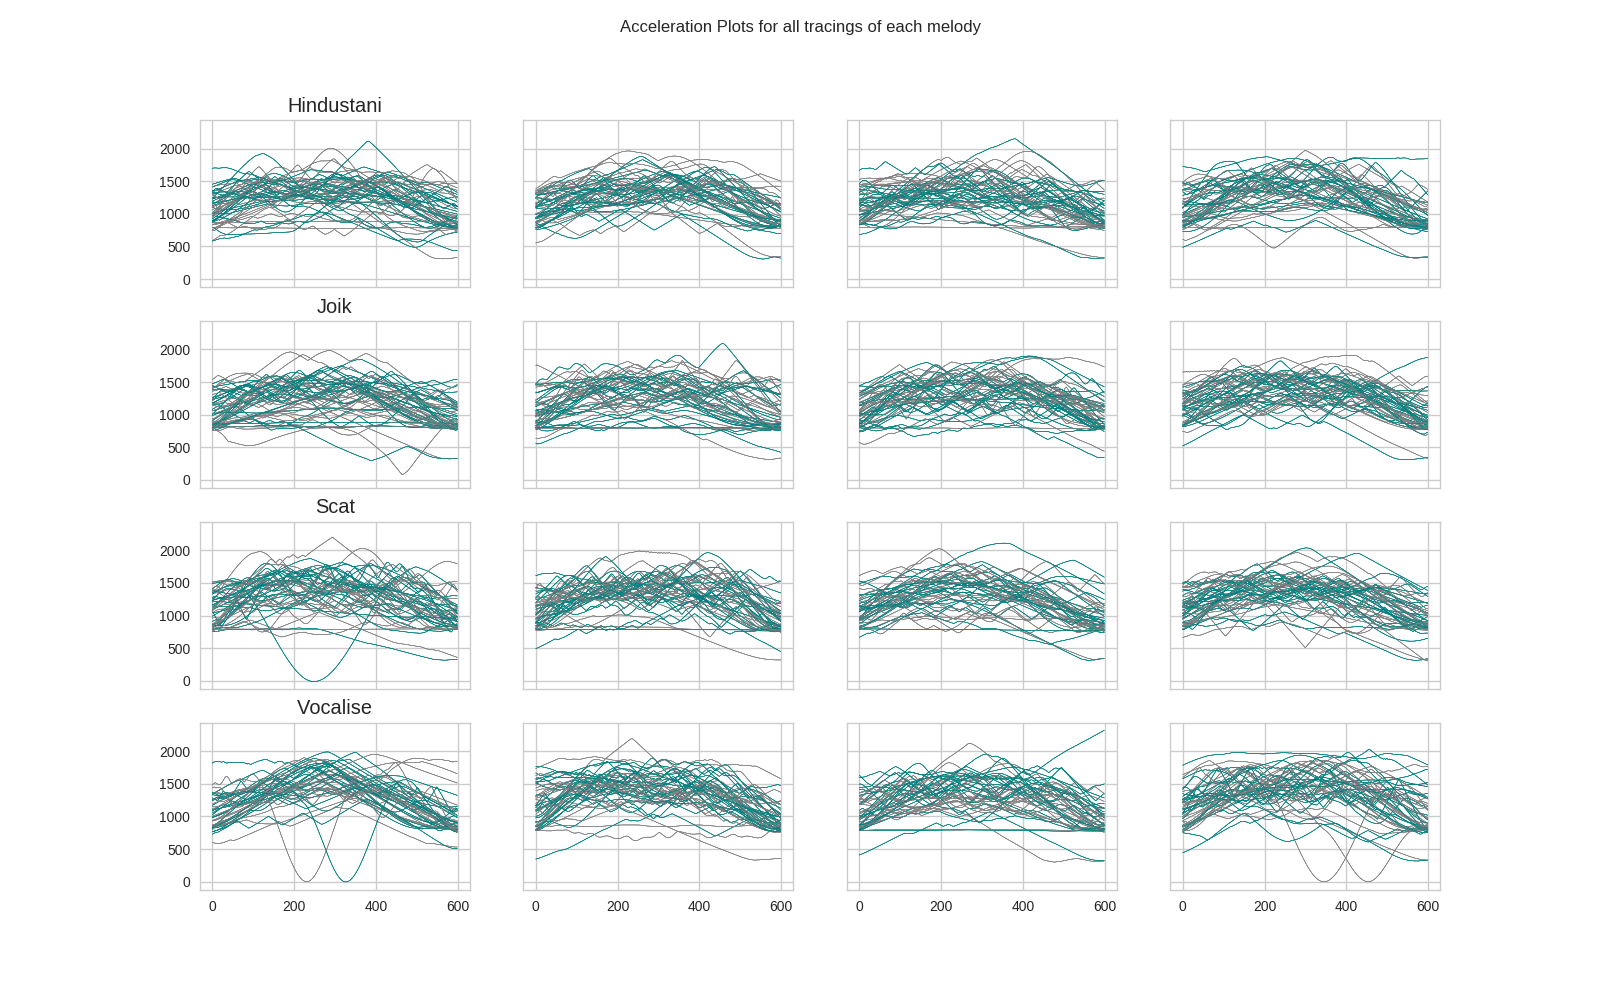

In [126]:
# y, ax = plt.subplots()
m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32 = ([] for i in range(32))

for i in range(len(contset)):
    mel = contset['melody'][i]
    v = contset['vels'][i]
    stri = 'm'+str(mel)
    eval(stri).append(contset['rz'][i])

f, ax = plt.subplots(4,4,sharex=True,sharey=True,figsize =(16,10))
for i in range(4):
    for i in range(len(m17)):
        ax[0,0].plot(m1[i],color = 'teal',linewidth = '0.3')
        ax[0,0].plot(m17[i],color = 'grey',linewidth = '0.3')
        ax[0,0].set_title('Hindustani')
    for i in range(len(m2)):
        ax[0,1].plot(m2[i],color = 'teal',linewidth = '0.3')
        ax[0,1].plot(m18[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m3)):
        ax[0,2].plot(m3[i],color = 'teal',linewidth = '0.3')
        ax[0,2].plot(m19[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m4)):
        ax[0,3].plot(m4[i],color = 'teal',linewidth = '0.3')
        ax[0,3].plot(m20[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m5)):
        ax[1,0].plot(m5[i],color = 'teal',linewidth = '0.3')
        ax[1,0].plot(m21[i],color = 'grey',linewidth = '0.3')
        ax[1,0].set_title('Joik')
    for i in range(len(m6)):
        ax[1,1].plot(m6[i],color = 'teal',linewidth = '0.3')
        ax[1,1].plot(m22[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m7)):
        ax[1,2].plot(m7[i],color = 'teal',linewidth = '0.3')
        ax[1,2].plot(m23[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m24)):
        ax[1,3].plot(m8[i],color = 'teal',linewidth = '0.3')
        ax[1,3].plot(m24[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m25)):
        ax[2,0].plot(m9[i],color = 'teal',linewidth = '0.3')
        ax[2,0].plot(m25[i],color = 'grey',linewidth = '0.3')
        ax[2,0].set_title('Scat')
    for i in range(len(m26)):
        ax[2,1].plot(m10[i],color = 'teal',linewidth = '0.3')
        ax[2,1].plot(m26[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m11)):
        ax[2,2].plot(m11[i],color = 'teal',linewidth = '0.3')
        ax[2,2].plot(m27[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m12)):
        ax[2,3].plot(m12[i],color = 'teal',linewidth = '0.3')
        ax[2,3].plot(m28[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m29)):
        ax[3,0].plot(m13[i],color = 'teal',linewidth = '0.3')
        ax[3,0].plot(m29[i],color = 'grey',linewidth = '0.3')
        ax[3,0].set_title('Vocalise')
    for i in range(len(m14)):
        ax[3,1].plot(m14[i],color = 'teal',linewidth = '0.3')
        ax[3,1].plot(m30[i],color = 'grey',linewidth = '0.3')
    for i in range(len(m15)):
        ax[3,2].plot(m15[i],color = 'grey',linewidth = '0.3')
        ax[3,2].plot(m31[i],color = 'teal',linewidth = '0.3')
    for i in range(len(m16)):
        ax[3,3].plot(m16[i],color = 'grey',linewidth = '0.3')
        ax[3,3].plot(m32[i],color = 'teal',linewidth = '0.3')



In [12]:
pitches = []
names = []
im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]

for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(ups(readpitch(strings)['F0_Hz']))
    names.append(str(i))        

cols = ['names','pitches']
    
melodies = pd.DataFrame(zip(names,pitches))
melodies.columns = cols

In [13]:
melodies

names                                            pitches
0      1                0
0    149.953407
1    149.94144...
1      2                0
0    160.888612
1    141.88633...
2      3                0
0    189.591800
1    191.00921...
3      4                0
0    214.205007
1    221.56683...
4      5                0
0    255.027198
1    247.67223...
5      6                0
0    101.126622
1     94.17632...
6      7                0
0    285.163078
1    283.41233...
7      8                0
0    237.864488
1    230.73741...
8      9                0
0    122.387140
1    115.15932...
9     10                0
0    270.991061
1    268.18451...
10    11                0
0    591.130618
1    644.98215...
11    12                0
0    459.816538
1    495.73617...
12    13                0
0    173.515116
1    171.35164...
13    14                0
0    437.429512
1    444.69017...
14    15                0
0    267.592244
1    262.28560...
15    16                0
0    280.963992
1    273.42747...

In [14]:
p32[1]

NameError: name 'p32' is not defined

In [15]:
subdata = pd.DataFrame(contset[contset.melody ==16][['key','rz']])
    
fig,ax = plt.subplots(2,3,figsize=(16,10))
for i in range(len(p20)):
    stri = p20[i]
    x1 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
    y2 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
    z3 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]
    x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
    y = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,1]
    z = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,2]
    # x = pitches[14]
    ax = fig.gca(projection='3d')
    ax.plot(x1,y2,z3,linewidth = 0.8,color = 'red')
    ax.plot(x,y,z,linewidth = 0.8, color = 'blue')

<IPython.core.display.Javascript object>

NameError: name 'p20' is not defined

In [16]:
x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
x

IOError: File /home/tejaswik/Documents/CurrentProjects/melmot/data/normdatadump/m19.csv does not exist

In [21]:
tracings

['10_27_3',
 '26_7_2',
 '1_25_5',
 '26_17_4',
 '14_27_1',
 '25_19_3',
 '1_10_4',
 '6_8_1',
 '2_7_3',
 '4_10_1',
 '2_16_3',
 '10_8_6',
 '22_27_2',
 '4_26_1',
 '12_22_1',
 '12_29_1',
 '10_28_3',
 '21_20_6',
 '28_32_1',
 '12_14_1',
 '14_8_1',
 '1_8_4',
 '20_22_2',
 '30_27_4',
 '26_25_2',
 '18_31_2',
 '31_3_2',
 '14_30_2',
 '10_1_3',
 '32_32_3',
 '26_16_4',
 '28_14_2',
 '9_1_4',
 '2_31_2',
 '21_28_4',
 '11_17_4',
 '9_26_4',
 '13_5_4',
 '25_1_3',
 '3_24_3',
 '16_29_1',
 '17_31_1',
 '7_10_2',
 '22_25_2',
 '2_25_3',
 '21_12_6',
 '8_16_3',
 '14_31_1',
 '31_14_2',
 '2_12_3',
 '12_4_1',
 '11_1_2',
 '32_5_3',
 '5_8_3',
 '17_22_1',
 '28_13_2',
 '18_30_1',
 '12_12_1',
 '5_4_3',
 '4_19_1',
 '32_31_4',
 '8_18_2',
 '6_30_1',
 '31_1_4',
 '32_12_3',
 '13_3_2',
 '16_19_4',
 '11_13_3',
 '18_32_1',
 '20_32_2',
 '12_23_1',
 '28_30_4',
 '18_7_2',
 '21_11_6',
 '9_10_4',
 '30_25_4',
 '9_5_3',
 '4_7_1',
 '4_11_1',
 '28_6_5',
 '20_19_2',
 '13_8_4',
 '20_29_1',
 '10_7_6',
 '32_17_4',
 '16_21_2',
 '17_21_2',
 '3_4

<IPython.core.display.Javascript object>


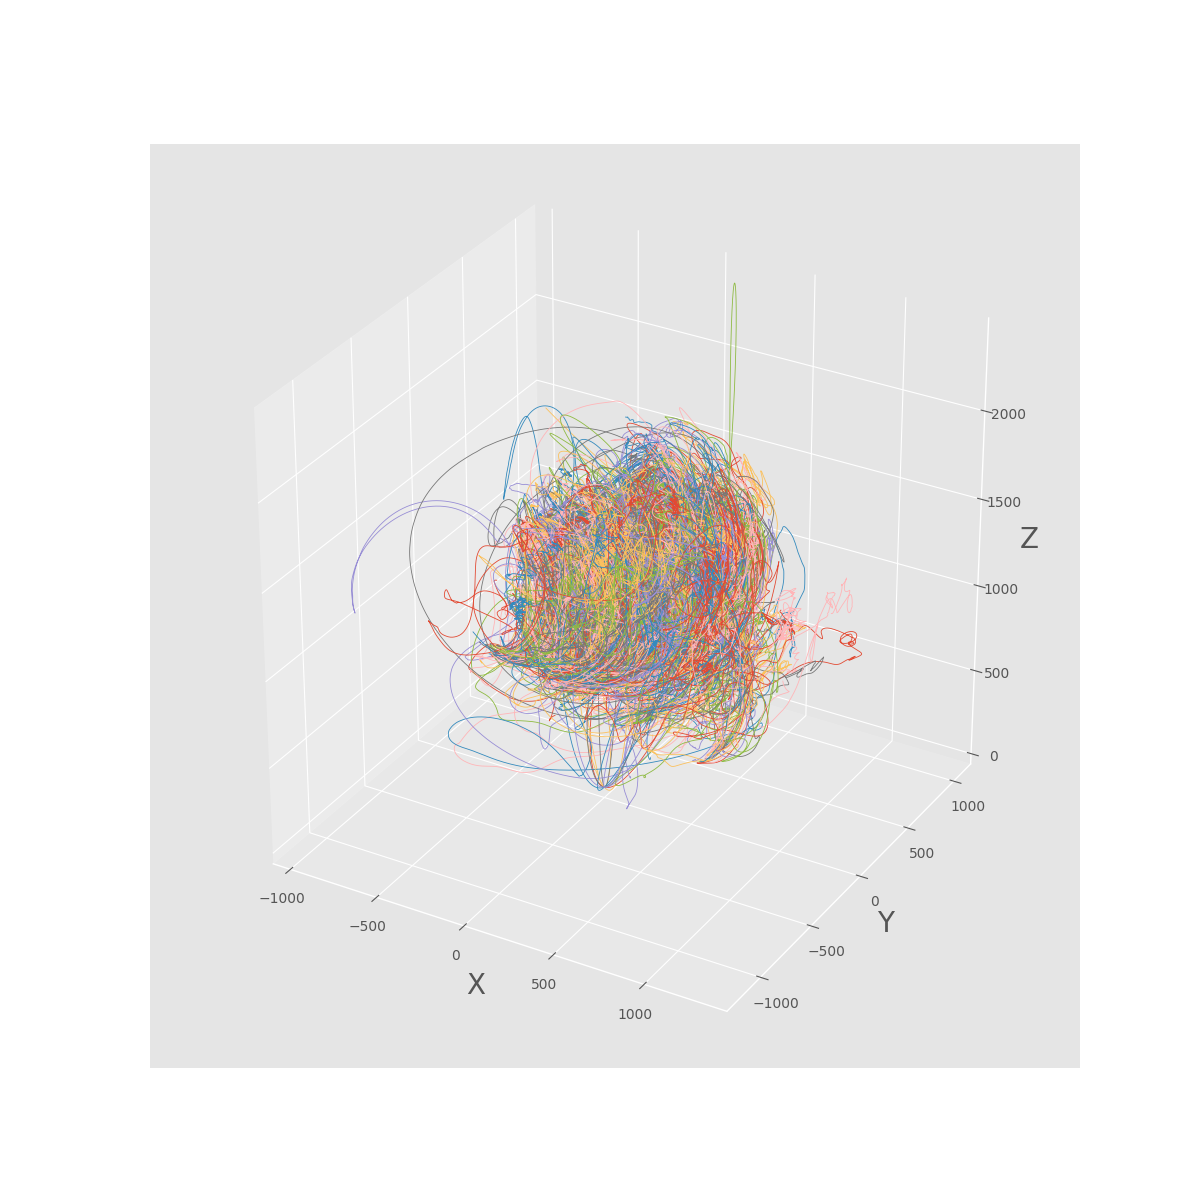

Text(0.5,0,u'Z')

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# subdata = pd.DataFrame(contset[contset.melody ==16][['key','rz']])
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
    
rangex = []
rangey = []
rangez = []
langex = []
langey = []
langez = []

for key in contset['key']:
    stri = tracings[key]
    x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
    y = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,1]
    z = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,2]
    langex.append([max(x),min(x)])
    langey.append([max(y),min(y)])
    langez.append([max(z),min(z)])
    x1 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
    y2 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
    z3 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]
    rangex.append([max(x),min(x)])
    rangey.append([max(y),min(y)])
    rangez.append([max(z),min(z)])
    ax = fig.gca(projection='3d')
    ax.plot(x,y,z,linewidth = 0.6)
    ax.plot(x1,y2,z3,linewidth = 0.6)
ax.set_xlabel('X',fontsize='20')
ax.set_ylabel('Y',fontsize='20') 
ax.set_zlabel('Z',fontsize='20')
#     ax[0,0].plot(x)
#     ax[0,1].plot(y)
#     ax[0,2].plot(z)
#     ax[1,0].plot(x1)
#     ax[1,1].plot(y2)
#     ax[1,2].plot(z3)

<IPython.core.display.Javascript object>


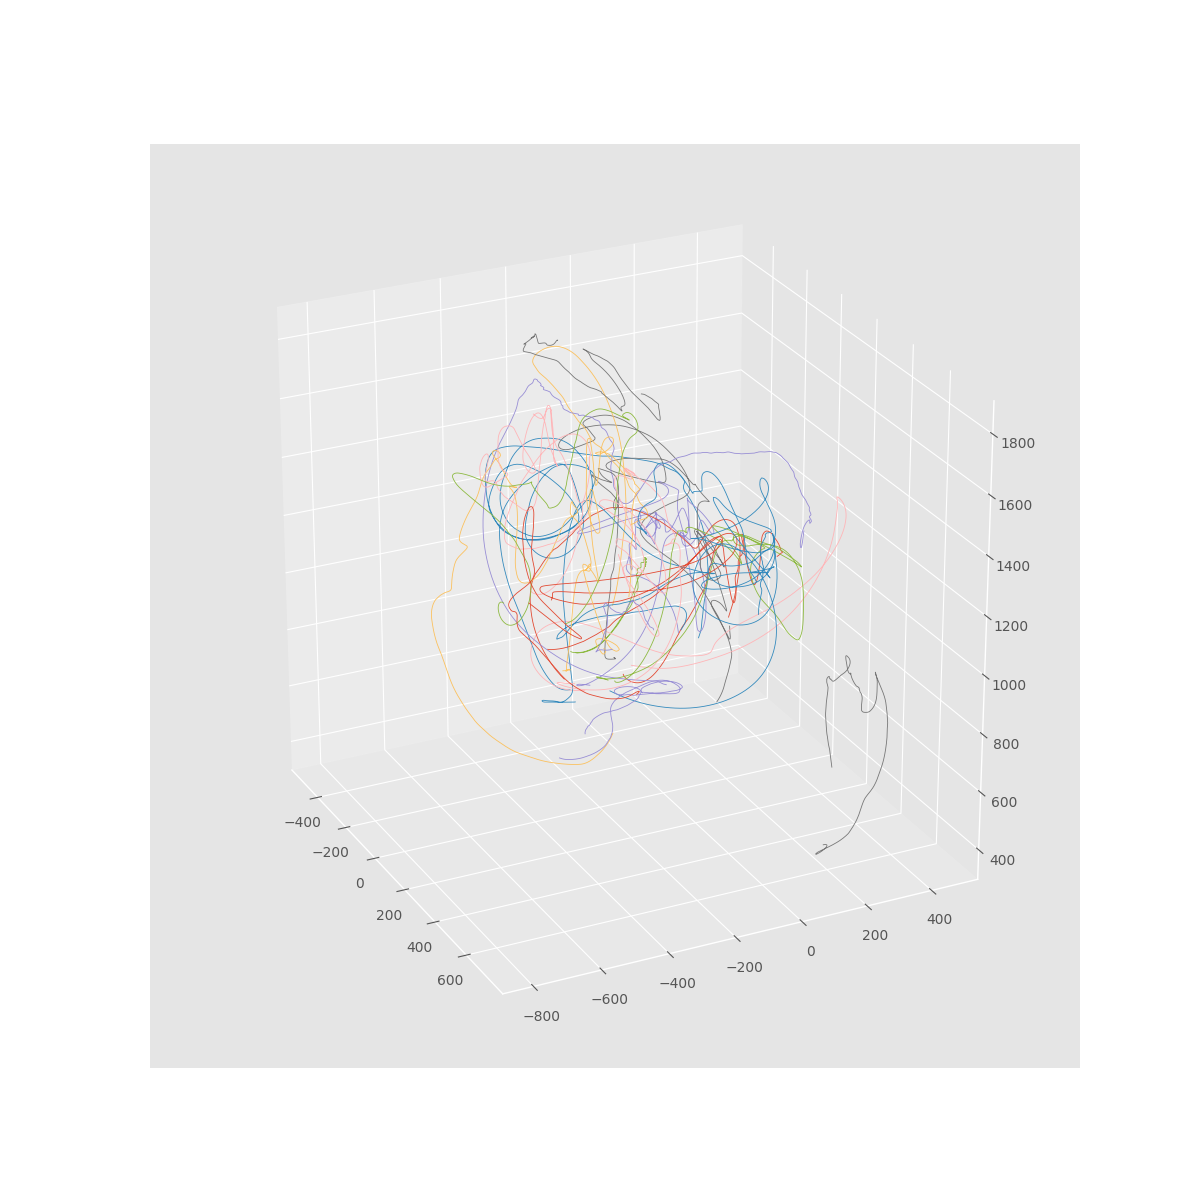

In [40]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
    
rangex = []
rangey = []
rangez = []
langex = []
langey = []
langez = []

for i in tracings:
    melID = returnDetails(i)['melID']
    if melID == '4':
#         x = pd.DataFrame.as_matrix(getlhrh(i)['lh'])[:,0]
#         y = pd.DataFrame.as_matrix(getlhrh(i)['lh'])[:,1]
#         z = pd.DataFrame.as_matrix(getlhrh(i)['lh'])[:,2]
        x1 = pd.DataFrame.as_matrix(getlhrh(i)['rh'])[:,0]
        y2 = pd.DataFrame.as_matrix(getlhrh(i)['rh'])[:,1]
        z3 = pd.DataFrame.as_matrix(getlhrh(i)['rh'])[:,2]
        ax = fig.gca(projection='3d')
        ax.plot(x1,y2,z3,linewidth = 0.6)

In [29]:
print langex, langey, langez
print rangex, rangey, rangez

[[599.09614146399997, 213.43015091200002], [438.17397046100001, 24.362004653299998], [521.378805392, 266.139718888], [615.23983648800004, 386.15490147599996], [92.872852790899998, -2.9465463739099995], [298.69086083000002, 125.018857579], [235.12978851400001, 111.71218720600001], [206.15644574400002, -133.72838340000001], [455.48061772699998, 379.82860563999998], [-347.25729947100001, -442.60200389199997], [563.88663790800001, 257.50369828700002], [261.29680047900001, 16.5255650197], [405.74357373300001, 177.09378678099998], [194.375166748, 116.57688082999999], [342.976482089, -37.103214259600001], [388.57579414800006, 144.090773281], [307.34237253399999, 208.10695229400002], [104.33752030399999, -420.12905049300002], [235.85366926, 217.15815462900002], [151.870226616, -167.464976175], [723.29665897999996, 355.08766925199996], [455.62665651999998, 260.18451744099997], [671.86131157099999, 201.89374955599999], [565.74094754800001, 84.743000574299998], [250.80608200099999, 129.156472439]

In [288]:
avdataset['langex'] = langex
avdataset['langey'] = langey
avdataset['langez'] = langez
avdataset['rangex'] = rangex
avdataset['rangey'] = rangey
avdataset['rangez'] = rangez


In [293]:
max(avdataset['rangey'][0][0],avdataset['rangez'][0][0])

1723.1821670899999

In [298]:
for i in range(len(participants)):
    participants['x'][i] = max(avdataset['rangex'][i][0],avdataset['langex'][i][0])
    participants['y'][i] = max(avdataset['rangey'][i][0],avdataset['langey'][i][0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [335]:
participants['ratio4'] = participants['height']/sum(participants['x'],participants['y'])
participants['ratio4'] = participants['height']/sum(participants['x'],participants['y'])

In [303]:
participants['ratio4'] = participants['height']/sum(participants['x'],participants['y'])
participants['ratio4'] = participants['height']/sum(participants['x'],participants['y'])

In [ ]:
plt.scatter

In [19]:
for i in avdataset.melody.unique():
    df2 = pd.DataFrame()
    df2['handstrat'] = avdataset[avdataset.melcat==i]['handstrat']
    df2['melcat'] = i
    handstrats = handstrats.append(df2)

In [67]:
stratcount = []
for i in handstrats.melcat.unique():
    sub = pd.DataFrame(handstrats[handstrats.melcat == i]['handstrat'])
    p = i
    s1 = len(pd.DataFrame(sub[sub.handstrat ==1]))
    s2 = len(pd.DataFrame(sub[sub.handstrat ==2]))
    s3 = len(pd.DataFrame(sub[sub.handstrat ==3]))
    s4 = len(pd.DataFrame(sub[sub.handstrat ==4]))
    s5 = len(pd.DataFrame(sub[sub.handstrat ==5]))
    s6 = len(pd.DataFrame(sub[sub.handstrat ==6]))
    stri = 'p'+str(i)
    stratcount.append([p,s1,s2,s3,s4,s6])

stratcount = pd.DataFrame(stratcount)
stratcount.columns = ['mel', 's1', 's2','s3','s4','s6']
stratcount

mel  s1  s2  s3  s4  s6
0    NaN   0   0   0   0   0
1   11.0  12  12  10  10   5
2    7.0  14  10  11   6   9
3    9.0  11  13  12   9   3
4    1.0  12   9  13  17   0
5    3.0  11  13  10  15   1
6   10.0  13  10   9   9   8
7    8.0  15   9  10  10   7
8   16.0  16   8  13   8   3
9    6.0  16   8   9  12   3
10  13.0  15   9  10   9   3
11  12.0  10  11  13   9   7
12   4.0  15  14  13   7   1
13  14.0  10  11  16  12   1
14  15.0  14  12  10   8   2
15   5.0  11  15  12  11   2
16   2.0  11  18   9   9   2

In [395]:
avdataset.keys()

Index([u'key', u'handstrat', u'participant', u'melody', u'sex', u'age',
       u'score', u'genre', u'proc', u'qommax', u'qommin', u'qomav',
       u'handdistmax', u'handdistmin', u'handdistav', u'zmax', u'zmin', u'zav',
       u'distlh', u'distrh', u'melcat', u'rangex', u'langex', u'langey',
       u'langez', u'rangey', u'rangez'],
      dtype='object')

In [398]:
scipy.stats.ttest_ind(avdataset['qommax'][avdataset['proc']=='syn'],avdataset['qommax'][avdataset['proc']=='norm'])

Ttest_indResult(statistic=0.1482156234695681, pvalue=0.88221032871941918)

In [300]:
for i in avdataset.proc.unique():
    df2 = pd.DataFrame()
    df2['handstrat'] = avdataset[avdataset.proc==i]['handstrat']
    df2['proc'] = i
    handstrats = handstrats.append(df2)

In [67]:
stratcount = []
for i in handstrats.melcat.unique():
    sub = pd.DataFrame(handstrats[handstrats.melcat == i]['handstrat'])
    p = i
    s1 = len(pd.DataFrame(sub[sub.handstrat ==1]))
    s2 = len(pd.DataFrame(sub[sub.handstrat ==2]))
    s3 = len(pd.DataFrame(sub[sub.handstrat ==3]))
    s4 = len(pd.DataFrame(sub[sub.handstrat ==4]))
    s5 = len(pd.DataFrame(sub[sub.handstrat ==5]))
    s6 = len(pd.DataFrame(sub[sub.handstrat ==6]))
    stri = 'p'+str(i)
    stratcount.append([p,s1,s2,s3,s4,s6])

stratcount = pd.DataFrame(stratcount)
stratcount.columns = ['mel', 's1', 's2','s3','s4','s6']
stratcount

mel  s1  s2  s3  s4  s6
0    NaN   0   0   0   0   0
1   11.0  12  12  10  10   5
2    7.0  14  10  11   6   9
3    9.0  11  13  12   9   3
4    1.0  12   9  13  17   0
5    3.0  11  13  10  15   1
6   10.0  13  10   9   9   8
7    8.0  15   9  10  10   7
8   16.0  16   8  13   8   3
9    6.0  16   8   9  12   3
10  13.0  15   9  10   9   3
11  12.0  10  11  13   9   7
12   4.0  15  14  13   7   1
13  14.0  10  11  16  12   1
14  15.0  14  12  10   8   2
15   5.0  11  15  12  11   2
16   2.0  11  18   9   9   2

In [384]:
stratcount.sum()

mel    136.0
s1     206.0
s2     182.0
s3     180.0
s4     161.0
s5       8.0
s6      57.0
dtype: float64

In [103]:
stratsum= stratcount.iloc[:,1:].sum()
fig,ax = plt.subplots(figsize = (15,10))
sns.set(font_scale=1.4)
yticks = ['Hindustani Melody1','Melody2','Melody3','Melody4','Joik Melody5','Melody6','Melody7','Melody8','Scat Melody9','Melody10','Melody11','Melody12','Vocalise Melody13','Melody14','Melody15','Melody16']
ax = sns.heatmap(stratcount.iloc[1:,:],linecolor='white',linewidths=0.2,annot=True, annot_kws={"size": 16},xticklabels=['Strategy1','Strategy 2','Strategy 3','Strategy 4','Strategy 5','Strategy 6'],
                yticklabels = yticks)
fig.text(0.5, 0.04, 'Mapping Strategies', ha='center',fontsize='20')
# fig.text(0.04, 0.3, 'Melodies', va='center', rotation='vertical',fontsize='20')
plt.yticks(rotation=0) 


# ax.set_xticklabels('Strategy1','Strategy 2','Strategy 3','Strategy 4','Strategy 5','Strategy 6')

<IPython.core.display.Javascript object>

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Text yticklabel objects>)

<IPython.core.display.Javascript object>


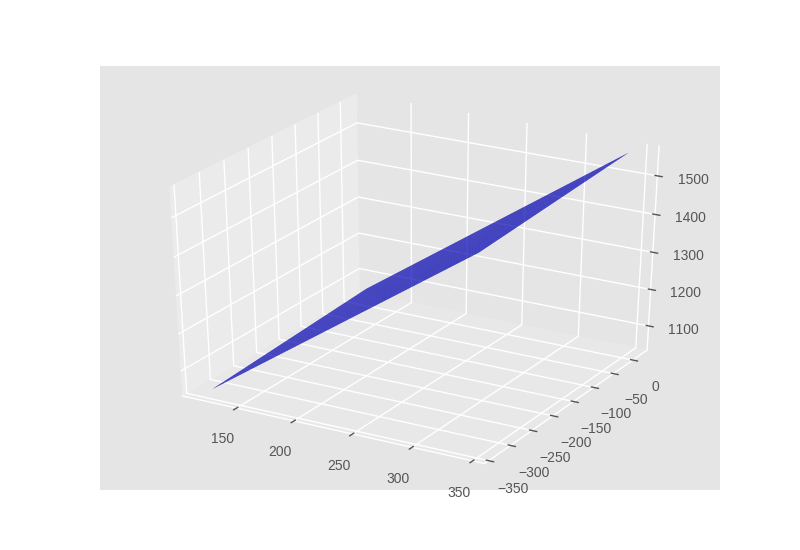

In [62]:
import numpy as np
X,Y = np.meshgrid(np.arange(xlim[0],xlim[1]),
                     np.arange(ylim[0],ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0]*X[r,c]+fit[1]*Y[r,c]+fit[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(X,Y,Z, color='blue')
plt.show()

In [ ]:
Z[r,c] = fit[0]*X[r,c]+fit[1]*Y[r,c]+fit[2]

In [ ]:
X.shape

<IPython.core.display.Javascript object>


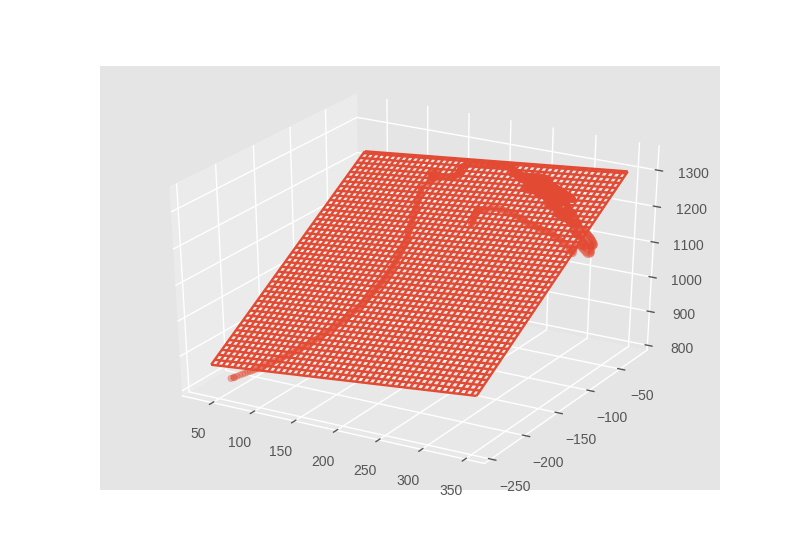

<IPython.core.display.Javascript object>


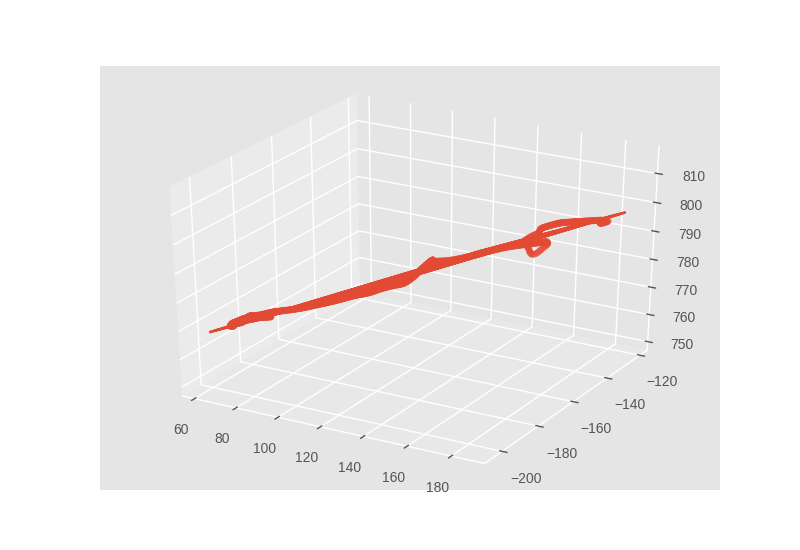

<IPython.core.display.Javascript object>


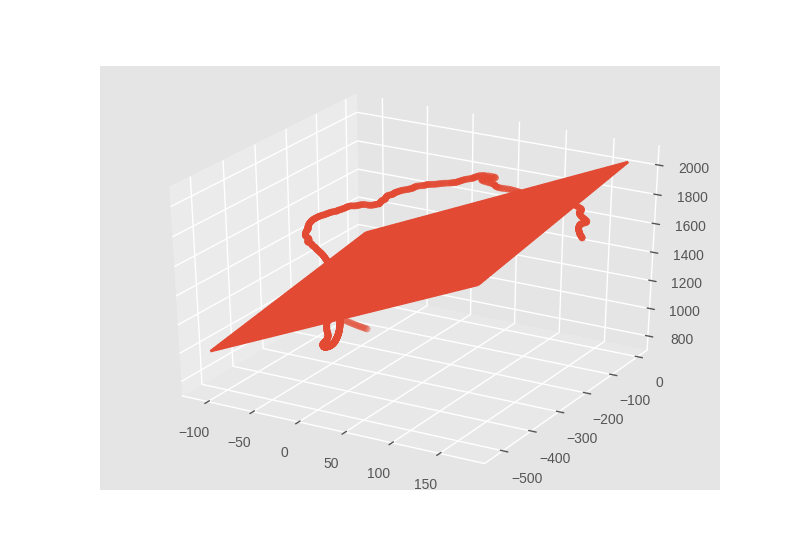

<IPython.core.display.Javascript object>


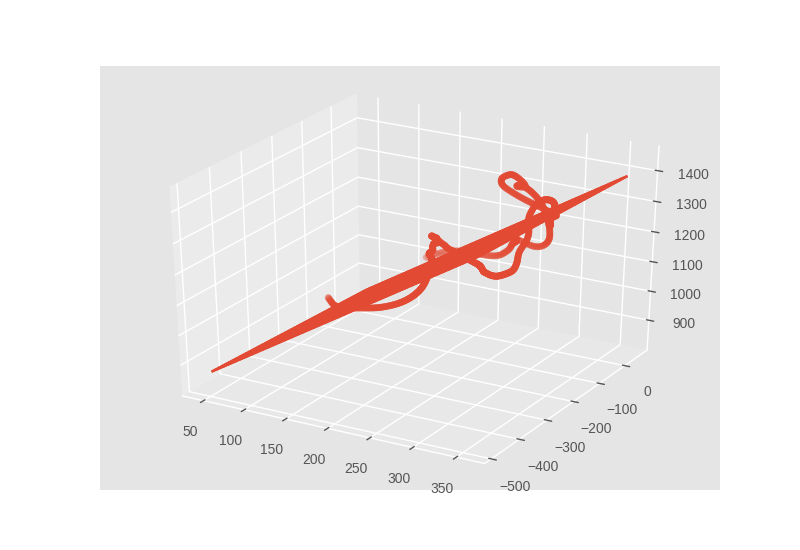

<IPython.core.display.Javascript object>


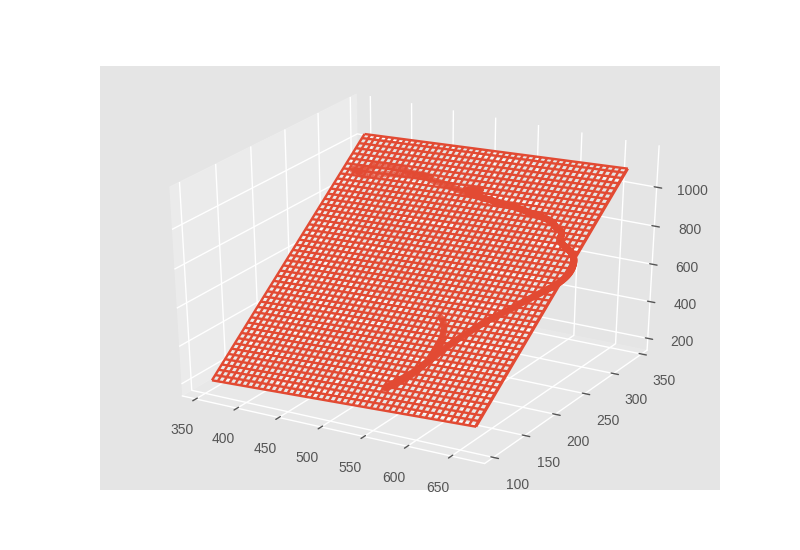

<IPython.core.display.Javascript object>


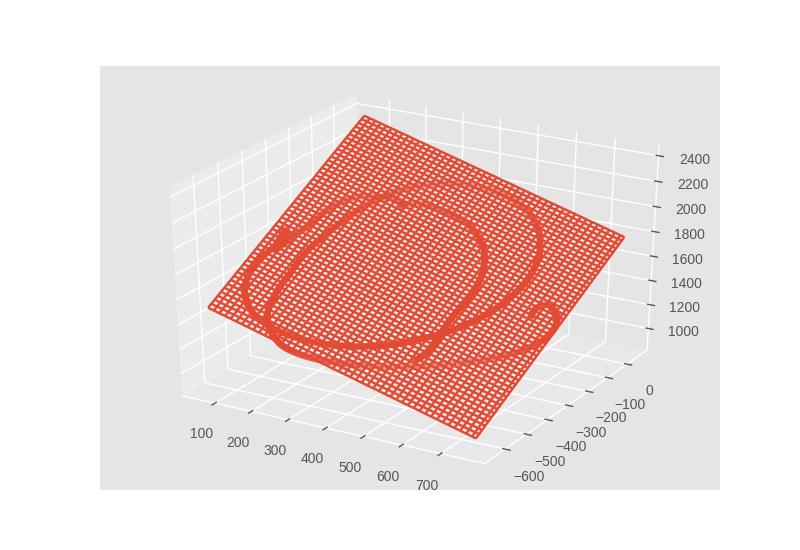

<IPython.core.display.Javascript object>


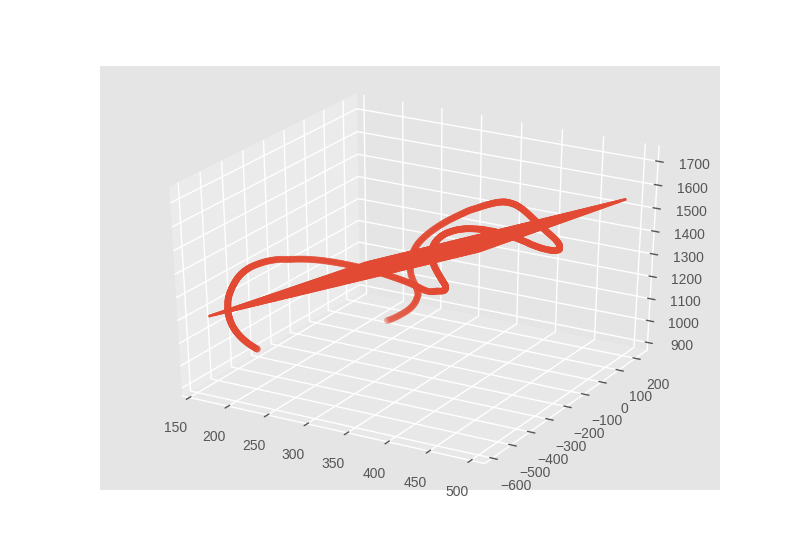

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


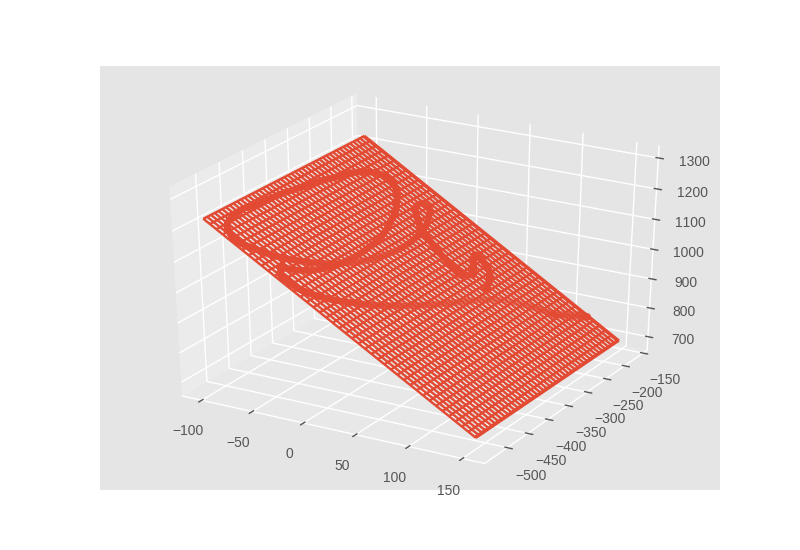

<IPython.core.display.Javascript object>


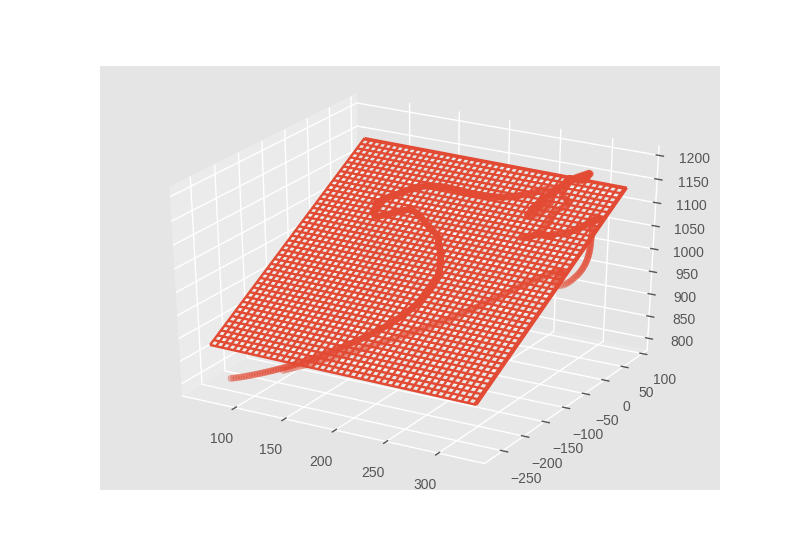

<IPython.core.display.Javascript object>


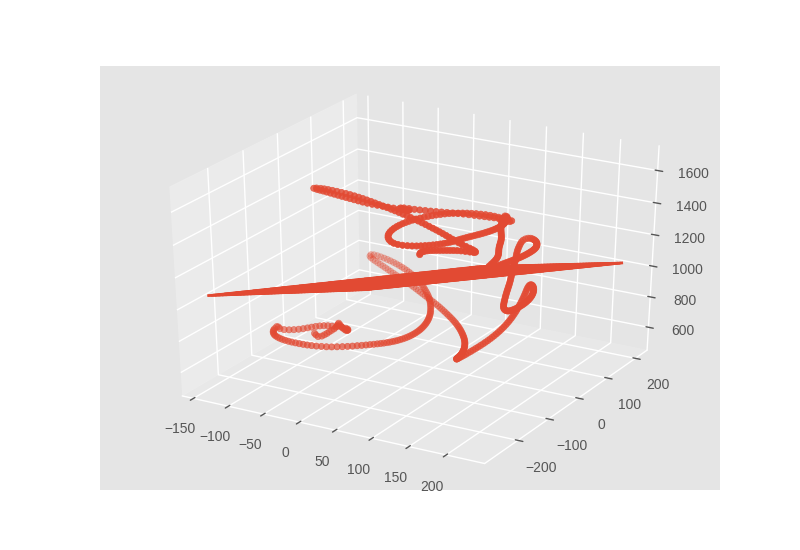

<IPython.core.display.Javascript object>


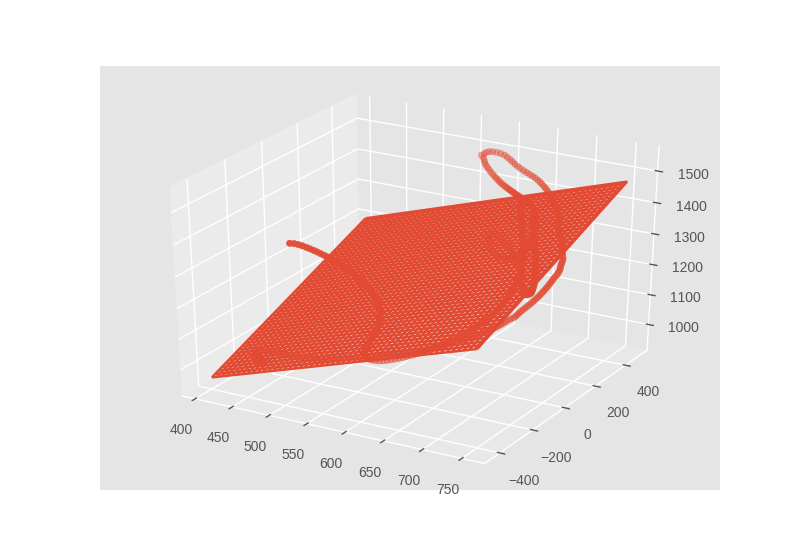

<IPython.core.display.Javascript object>


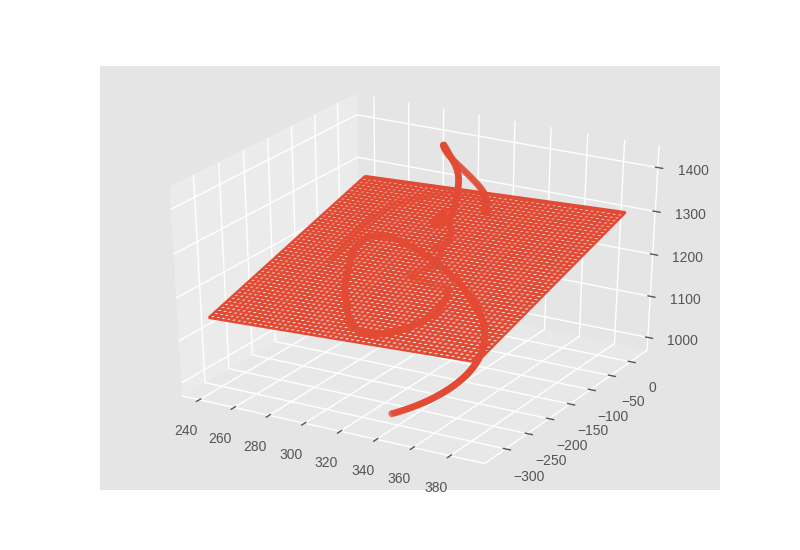

<IPython.core.display.Javascript object>


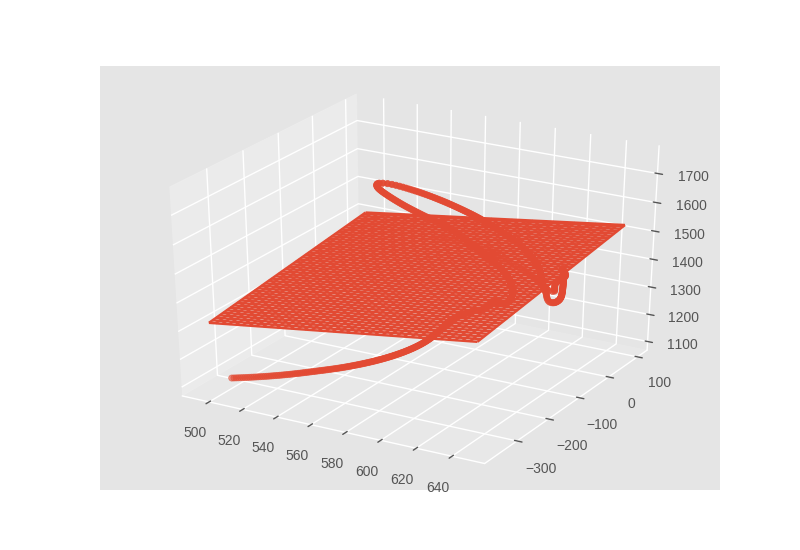

<IPython.core.display.Javascript object>


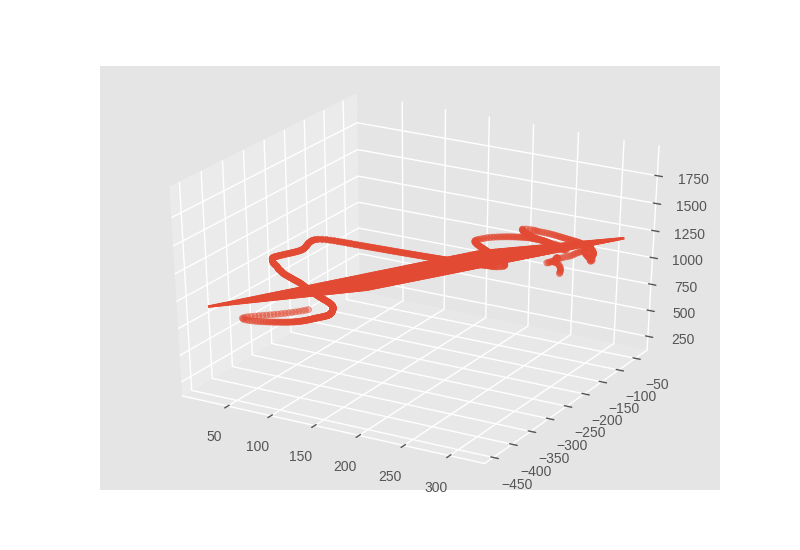

<IPython.core.display.Javascript object>


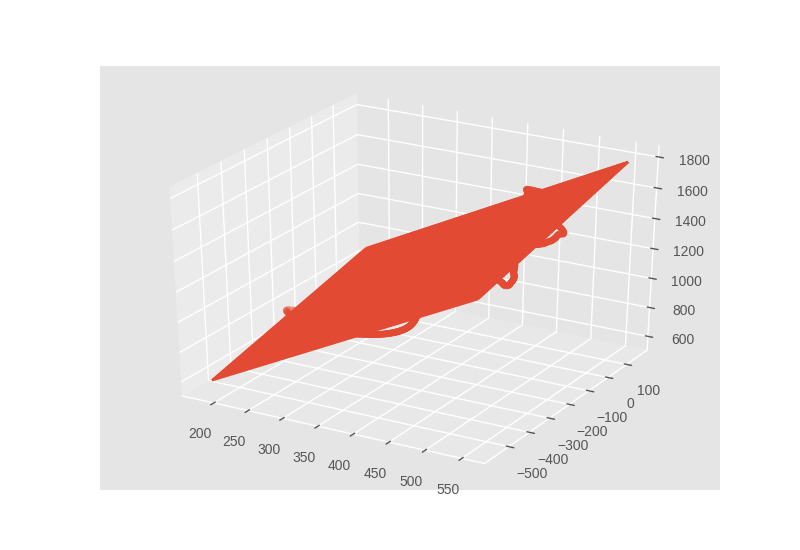

<IPython.core.display.Javascript object>


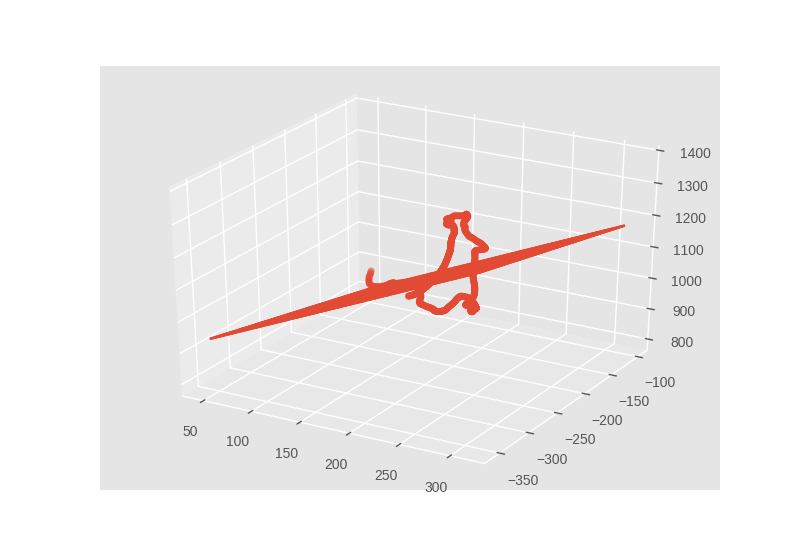

<IPython.core.display.Javascript object>


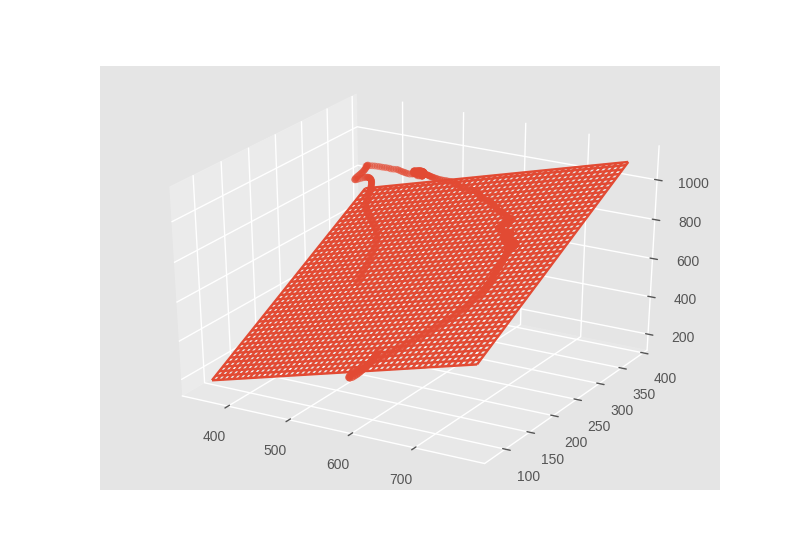

<IPython.core.display.Javascript object>


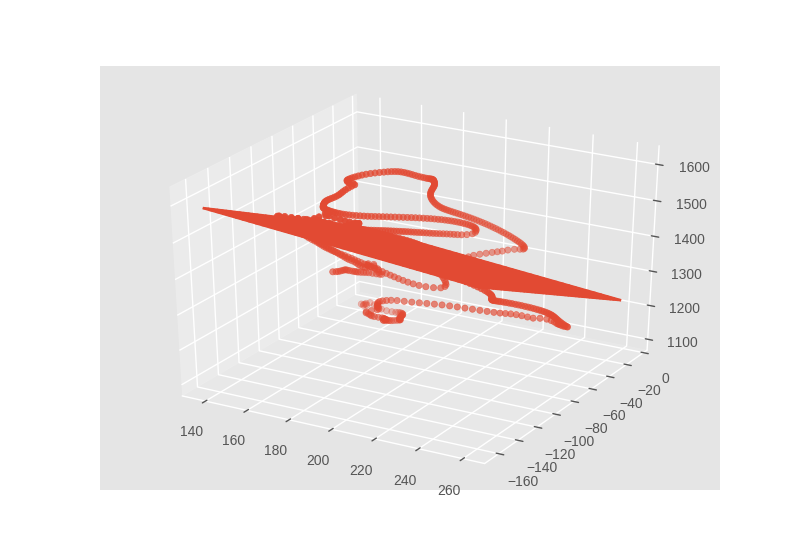

<IPython.core.display.Javascript object>


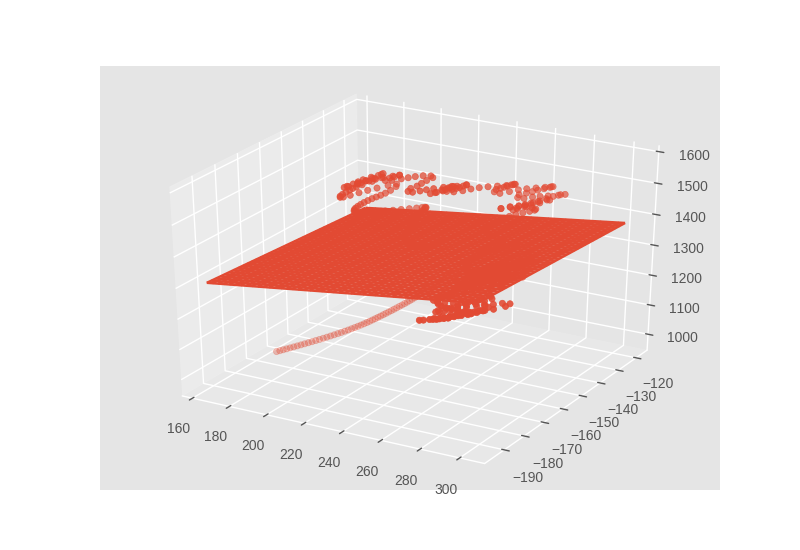

<IPython.core.display.Javascript object>


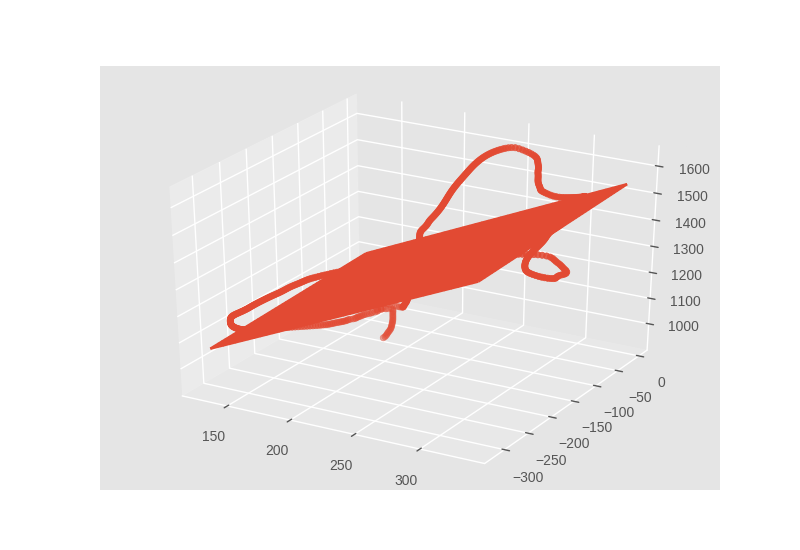

In [61]:

for i in range(20):
    stri = random.choice(tracings)
    
    points = getlhrh(stri)['rh']
    tmp_A = []
    tmp_b = []
    for i in range(len(points['RHX'])):
        tmp_A.append([points['RHX'][i],points['RHY'][i],1])
        tmp_b.append(points['RHZ'][i])
    b = np.matrix(tmp_b).T
    A = np.matrix(tmp_A)
    fit  = (A.T * A).I * A.T * b
    errors = b - A * fit
    residual = np.linalg.norm(errors)

    x = points['RHX']
    y = points['RHY']
    z = points['RHZ']

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(x,y,z)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    X,Y = np.meshgrid(np.arange(xlim[0],xlim[1]),
                     np.arange(ylim[0],ylim[1]))
    Z = np.zeros(X.shape)
    for r in range(X.shape[0]):
        for c in range(X.shape[1]):
            Z[r,c] = fit[0]*X[r,c]+fit[1]*Y[r,c]+fit[2]
    ax.plot_wireframe(X,Y,Z)

In [1]:
points = getlhrh(tracings[2])['lh']

x = points['LHX']
y = points['LHY']
z = points['LHZ']

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)

NameError: name 'getlhrh' is not defined

/usr/local/lib/python2.7/dist-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: data (x,y) size is too small or smoothing parameter
s is too small (fp>s).
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


<IPython.core.display.Javascript object>


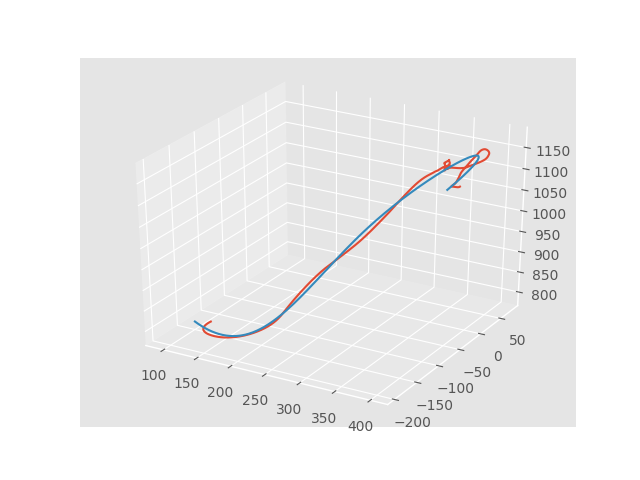

<IPython.core.display.Javascript object>


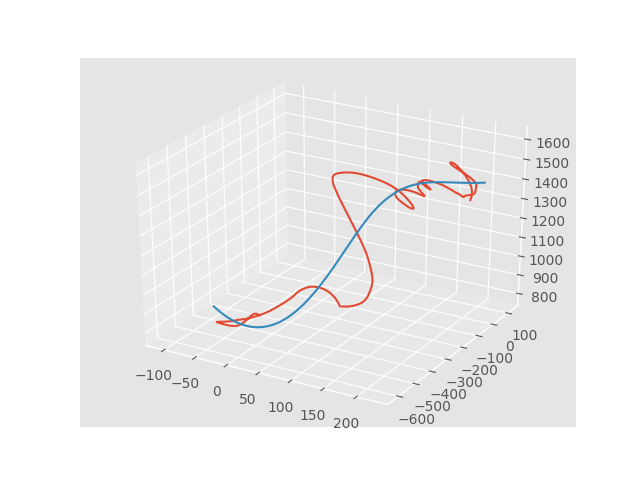

<IPython.core.display.Javascript object>


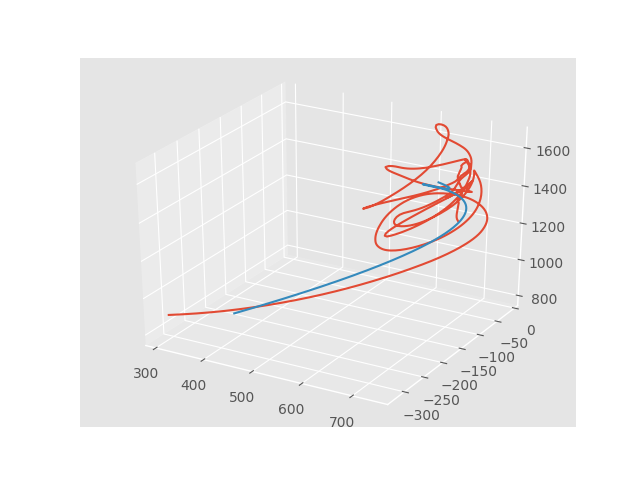

<IPython.core.display.Javascript object>


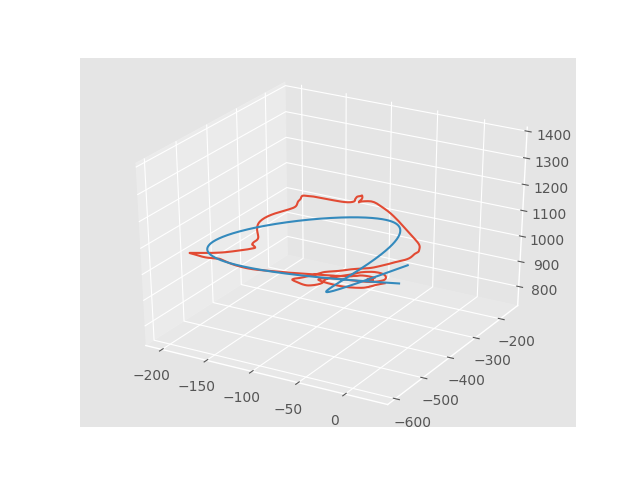

<IPython.core.display.Javascript object>


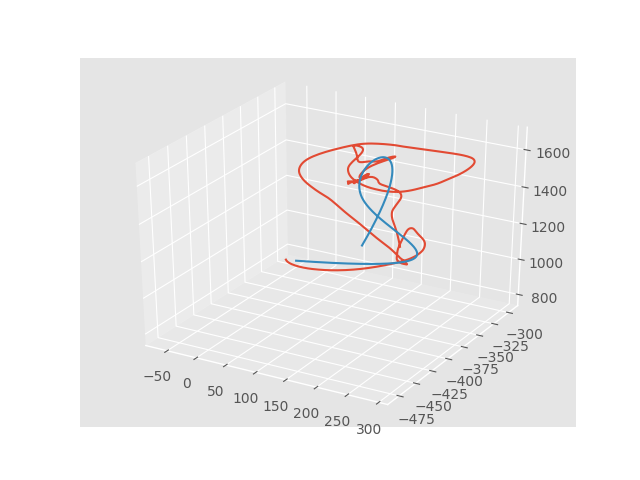

<IPython.core.display.Javascript object>


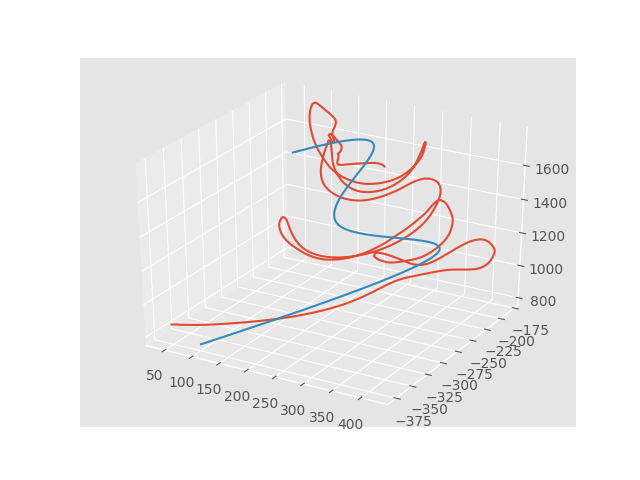

<IPython.core.display.Javascript object>


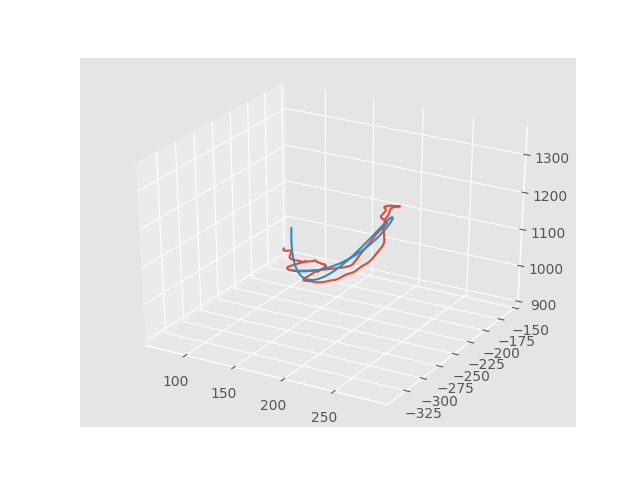

<IPython.core.display.Javascript object>


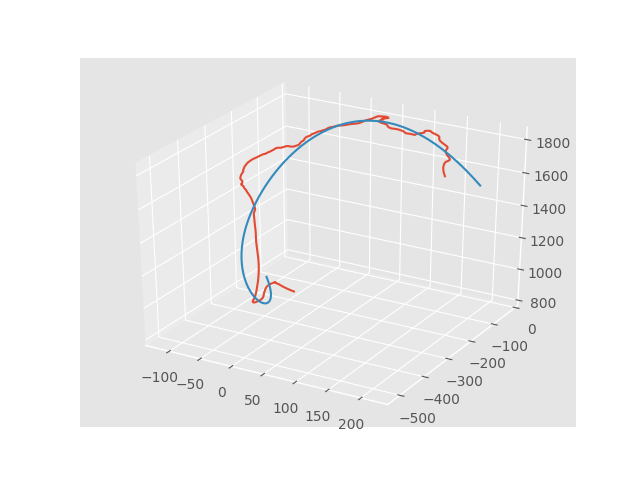

<IPython.core.display.Javascript object>


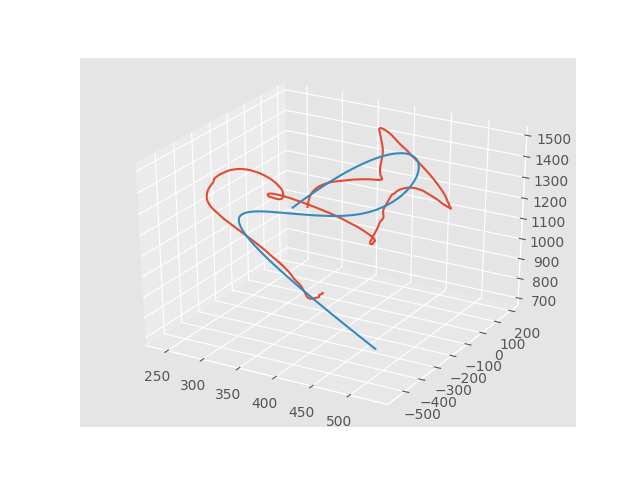

<IPython.core.display.Javascript object>


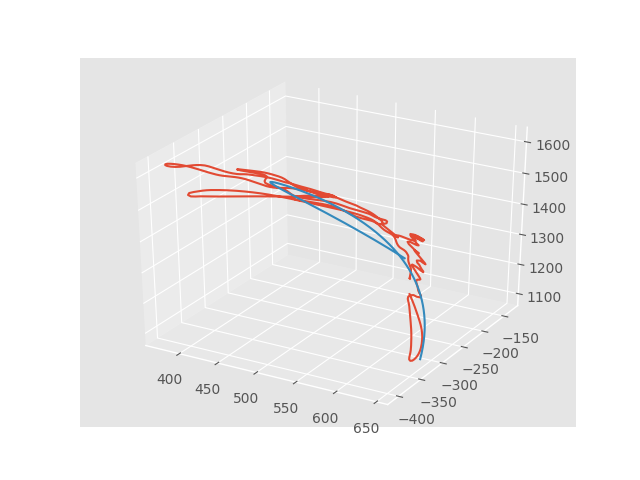

<IPython.core.display.Javascript object>


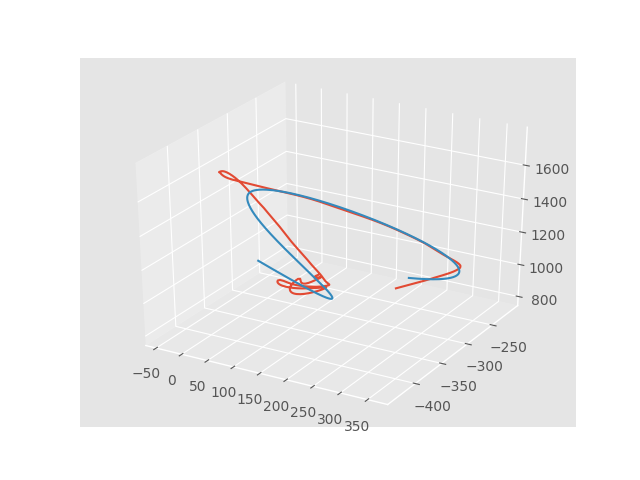

<IPython.core.display.Javascript object>


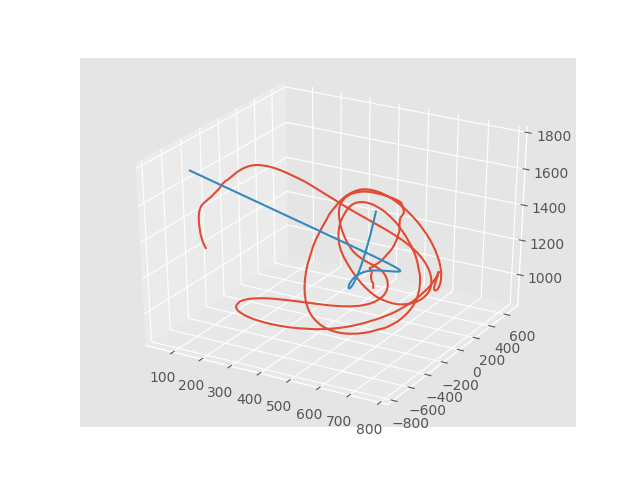

<IPython.core.display.Javascript object>


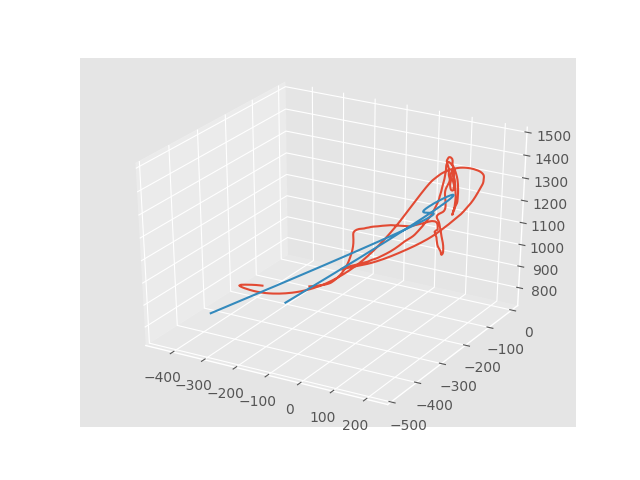

<IPython.core.display.Javascript object>


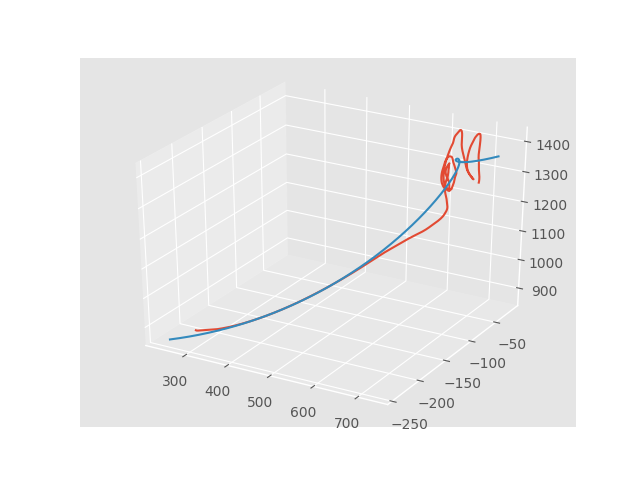

<IPython.core.display.Javascript object>


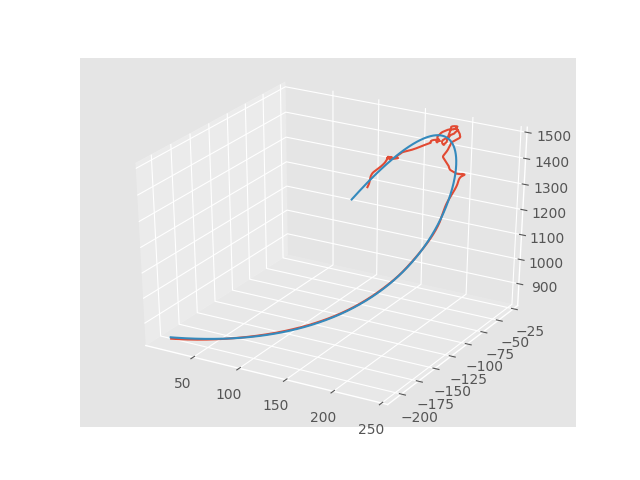

<IPython.core.display.Javascript object>


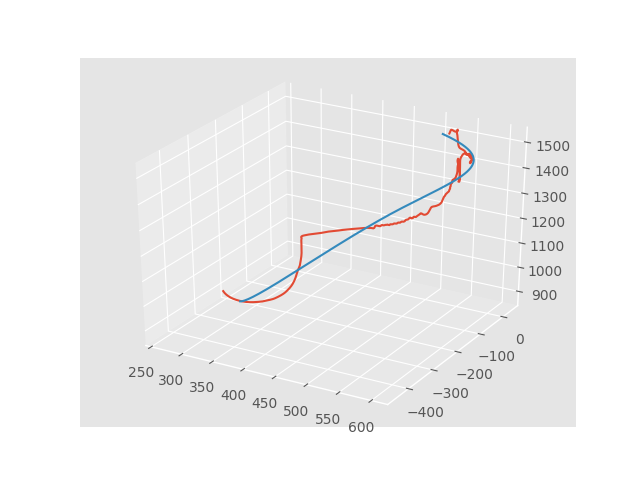

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


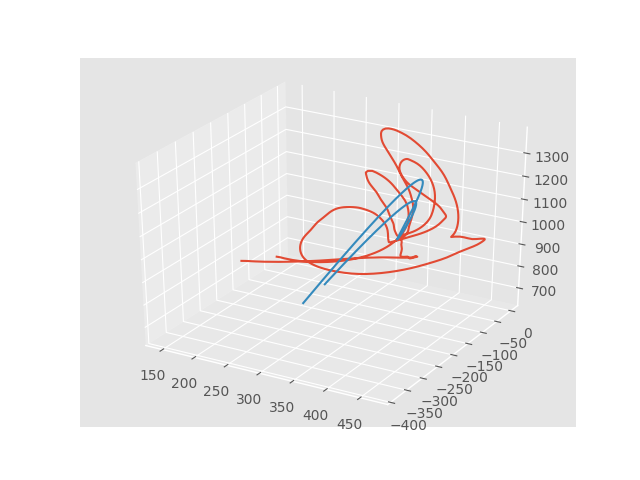

<IPython.core.display.Javascript object>


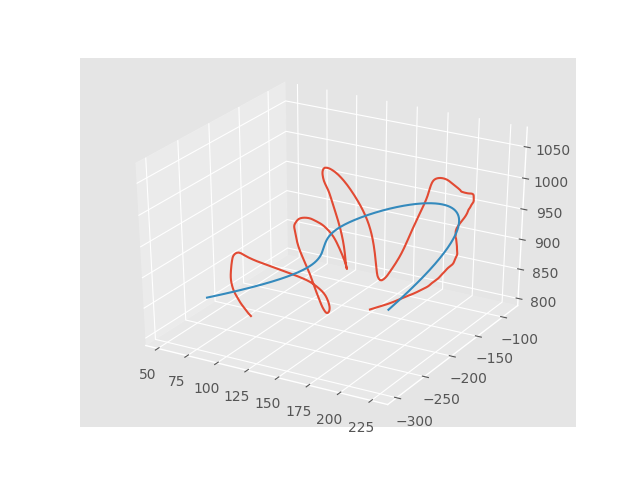

<IPython.core.display.Javascript object>


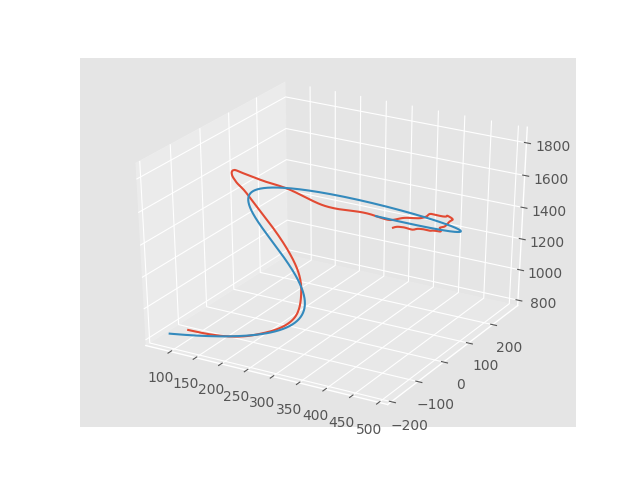

<IPython.core.display.Javascript object>


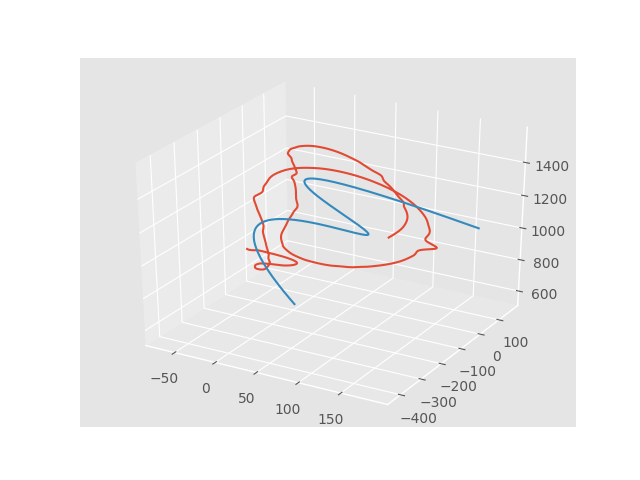

In [18]:
from scipy.interpolate import splprep, splev
from numpy import linspace

for i in range(0,20,1):
    stri = random.choice(tracings)

    x = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
    y = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
    z = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]

    coords = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])
    x = coords[:,0]
    y = coords[:,1]
    z = coords[:,2]
    tckp,u = splprep([x,y,z],s=1.0,k=3,nest=8)
    xnew,ynew,znew = splev(linspace(0,1,600),tckp)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x,y,z)
    ax.plot(xnew,ynew,znew)

'''
1. markov pen
2. pitch change windows - compare with respective motions
3. project onto saggital axis
4. project onto plane-fitting-plane
5. birds vs human motor hypothesis
6. joik 2 - all the diff curves
7. direct corr bet smoothness and qom curves with pitch of song
8. use hand strategies to decompose 3d data
9. n gram of strategy pairs within participants and within melodies
10. POLAR COORDINATES
11. taxonomy of to-do-lists of motion

'''


